In [1]:
from spuco.datasets import SpuCoMNIST, SpuriousFeatureDifficulty

import torch
import torchvision.transforms as transform

import matplotlib.pyplot as plt

In [2]:
difficulty = SpuriousFeatureDifficulty.MAGNITUDE_LARGE

classes = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]

device = device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
trainset = SpuCoMNIST(
    root='data',
    spurious_correlation_strength=0.99,
    classes=classes,
    spurious_feature_difficulty=difficulty,
    split='train'
)
trainset.initialize()

In [4]:
valset = SpuCoMNIST(
    root='data',
    classes=classes,
    spurious_feature_difficulty=difficulty,
    split='val'
)
valset.initialize()

In [5]:
testset = SpuCoMNIST(
    root='data',
    classes=classes,
    spurious_feature_difficulty=difficulty,
    split='test'
)
testset.initialize()

In [6]:
print(len(trainset))
print(len(valset))
print(len(testset))

48004
11996
10000


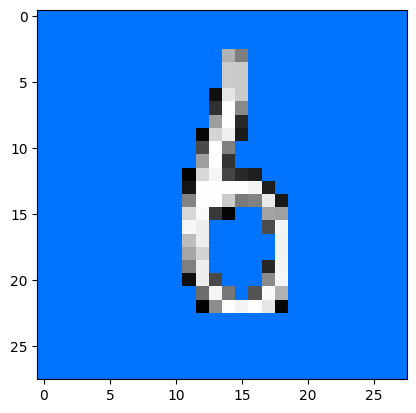

3


In [7]:
plt.imshow(transform.ToPILImage()(trainset[500][0]).resize((28, 28)))
plt.show()
print(trainset[500][1])

In [ ]:
from spuco.models import model_factory
from spuco.robust_train import ERM
from torch.optim import SGD

model = model_factory('lenet', trainset[0][0].shape, trainset.num_classes).to(device)
erm = ERM(
    trainset=trainset,
    model=model,
    num_epochs=1,
    batch_size=64,
    optimizer=SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True),
    device=device,
    verbose=False,
)

erm.train()

Epoch 0:   0%|          | 0/751 [00:00<?, ?batch/s]

In [51]:
from spuco.evaluate import Evaluator

evaluator = Evaluator(
    testset=testset,
    group_partition=testset.group_partition,
    group_weights=trainset.group_weights,
    batch_size=64,
    model=model,
    device=device,
    verbose=True
)
evaluator.evaluate()

Evaluating group-wise accuracy:   4%|▍         | 1/25 [00:06<02:39,  6.63s/it]

Group (0, 0) Accuracy: 100.0


Evaluating group-wise accuracy:   8%|▊         | 2/25 [00:13<02:29,  6.51s/it]

Group (0, 1) Accuracy: 0.0


Evaluating group-wise accuracy:  12%|█▏        | 3/25 [00:19<02:24,  6.58s/it]

Group (0, 2) Accuracy: 0.0


Evaluating group-wise accuracy:  16%|█▌        | 4/25 [00:27<02:24,  6.89s/it]

Group (0, 3) Accuracy: 0.0


Evaluating group-wise accuracy:  20%|██        | 5/25 [00:33<02:14,  6.73s/it]

Group (0, 4) Accuracy: 9.692671394799055


Evaluating group-wise accuracy:  24%|██▍       | 6/25 [00:40<02:09,  6.80s/it]

Group (1, 0) Accuracy: 0.0


Evaluating group-wise accuracy:  28%|██▊       | 7/25 [00:47<02:02,  6.79s/it]

Group (1, 1) Accuracy: 100.0


Evaluating group-wise accuracy:  32%|███▏      | 8/25 [00:54<01:55,  6.80s/it]

Group (1, 2) Accuracy: 0.24509803921568626


Evaluating group-wise accuracy:  36%|███▌      | 9/25 [01:01<01:51,  6.96s/it]

Group (1, 3) Accuracy: 0.0


Evaluating group-wise accuracy:  40%|████      | 10/25 [01:08<01:44,  6.94s/it]

Group (1, 4) Accuracy: 0.0


Evaluating group-wise accuracy:  44%|████▍     | 11/25 [01:15<01:36,  6.89s/it]

Group (2, 0) Accuracy: 0.0


Evaluating group-wise accuracy:  48%|████▊     | 12/25 [01:21<01:29,  6.90s/it]

Group (2, 1) Accuracy: 0.0


Evaluating group-wise accuracy:  52%|█████▏    | 13/25 [01:28<01:21,  6.79s/it]

Group (2, 2) Accuracy: 100.0


Evaluating group-wise accuracy:  56%|█████▌    | 14/25 [01:35<01:15,  6.82s/it]

Group (2, 3) Accuracy: 0.0


Evaluating group-wise accuracy:  60%|██████    | 15/25 [01:41<01:06,  6.68s/it]

Group (2, 4) Accuracy: 0.0


Evaluating group-wise accuracy:  64%|██████▍   | 16/25 [01:48<00:59,  6.59s/it]

Group (3, 0) Accuracy: 0.0


Evaluating group-wise accuracy:  68%|██████▊   | 17/25 [01:54<00:52,  6.51s/it]

Group (3, 1) Accuracy: 0.0


Evaluating group-wise accuracy:  72%|███████▏  | 18/25 [02:00<00:45,  6.46s/it]

Group (3, 2) Accuracy: 0.0


Evaluating group-wise accuracy:  76%|███████▌  | 19/25 [02:07<00:38,  6.40s/it]

Group (3, 3) Accuracy: 100.0


Evaluating group-wise accuracy:  80%|████████  | 20/25 [02:13<00:31,  6.38s/it]

Group (3, 4) Accuracy: 0.0


Evaluating group-wise accuracy:  84%|████████▍ | 21/25 [02:19<00:25,  6.38s/it]

Group (4, 0) Accuracy: 0.0


Evaluating group-wise accuracy:  88%|████████▊ | 22/25 [02:26<00:19,  6.48s/it]

Group (4, 1) Accuracy: 0.0


Evaluating group-wise accuracy:  92%|█████████▏| 23/25 [02:33<00:13,  6.52s/it]

Group (4, 2) Accuracy: 0.0


Evaluating group-wise accuracy:  96%|█████████▌| 24/25 [02:39<00:06,  6.53s/it]

Group (4, 3) Accuracy: 0.0


Evaluating group-wise accuracy: 100%|██████████| 25/25 [02:46<00:00,  6.65s/it]

Group (4, 4) Accuracy: 96.21212121212122


{(0, 0): 100.0,
 (0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (0, 4): 9.692671394799055,
 (1, 0): 0.0,
 (1, 1): 100.0,
 (1, 2): 0.24509803921568626,
 (1, 3): 0.0,
 (1, 4): 0.0,
 (2, 0): 0.0,
 (2, 1): 0.0,
 (2, 2): 100.0,
 (2, 3): 0.0,
 (2, 4): 0.0,
 (3, 0): 0.0,
 (3, 1): 0.0,
 (3, 2): 0.0,
 (3, 3): 100.0,
 (3, 4): 0.0,
 (4, 0): 0.0,
 (4, 1): 0.0,
 (4, 2): 0.0,
 (4, 3): 0.0,
 (4, 4): 96.21212121212122}

In [52]:
evaluator.worst_group_accuracy

((0, 1), 0.0)

In [53]:
evaluator.average_accuracy

98.26133731382677

In [54]:
evaluator.evaluate_spurious_attribute_prediction()

20.58

In [28]:
from spuco.utils import Trainer

trainer = Trainer(
    trainset=trainset,
    model=model,
    batch_size=64,
    optimizer=SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True),
    device=device,
    verbose=True,
)


In [55]:
from spuco.group_inference import Cluster, ClusterAlg

logits = erm.trainer.get_trainset_outputs()

cluster = Cluster(
    Z=logits,
    class_labels=trainset.labels,
    cluster_alg=ClusterAlg.KMEANS,
    num_clusters=2,
    device=device,
    verbose=True
)
group_partition = cluster.infer_groups()

Clustering class-wise: 100%|██████████| 5/5 [00:00<00:00, 29.37it/s]


In [56]:
for key in sorted(group_partition.keys()):
    print(key, len(group_partition[key]))

(0, 0) 10031
(0, 1) 102
(1, 0) 9575
(1, 1) 97
(2, 0) 8920
(2, 1) 91
(3, 0) 9649
(3, 1) 98
(4, 0) 9346
(4, 1) 95


In [57]:
evaluator = Evaluator(
    testset=trainset,
    group_partition=group_partition,
    group_weights=trainset.group_weights,
    batch_size=64,
    model=model,
    device=device,
    verbose=True
)

In [ ]:
from spuco.robust_train import GroupBalanceBatchERM

model = model_factory("lenet", trainset[0][0].shape, trainset.num_classes).to(device)
group_balance_erm = GroupBalanceBatchERM(
    model=model,
    num_epochs=5,
    trainset=trainset,
    group_partition=group_partition,
    batch_size=64,
    optimizer=SGD(model.parameters(), lr=1e-3, weight_decay=5e-4, momentum=0.9, nesterov=True),
    device=device,
    verbose=False
)
group_balance_erm.train()

Epoch 0:   2%|▏         | 14/751 [00:12<07:39,  1.60batch/s, accuracy=32.8125%, loss=1.6]  

GB | Epoch 0 | Loss: 1.6103696823120117 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6194547414779663 | Accuracy: 12.5%
GB | Epoch 0 | Loss: 1.6073358058929443 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6102625131607056 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6052618026733398 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6067931652069092 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6270884275436401 | Accuracy: 14.0625%
GB | Epoch 0 | Loss: 1.6033207178115845 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6086121797561646 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.613183856010437 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6070855855941772 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6178202629089355 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6214320659637451 | Accuracy: 12.5%
GB | Epoch 0 | Loss: 1.6296712160110474 | Accuracy: 9.375%
GB | Epoch 0 | Loss: 1.6021660566329956 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6032617092132568 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6120651960372925 | 

Epoch 0:   6%|▌         | 42/751 [00:12<01:41,  6.98batch/s, accuracy=25.0%, loss=1.61]   

GB | Epoch 0 | Loss: 1.615069031715393 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6107242107391357 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6056616306304932 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.608683705329895 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6058356761932373 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6042042970657349 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6012531518936157 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.614403247833252 | Accuracy: 12.5%
GB | Epoch 0 | Loss: 1.6044377088546753 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.618090033531189 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6051926612854004 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6100263595581055 | Accuracy: 15.625%
GB | Epoch 0 | Loss: 1.6074309349060059 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.621367335319519 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6249778270721436 | Accuracy: 10.9375%
GB | Epoch 0 | Loss: 1.614370584487915 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.611666202545166 | Accuracy: 20.3125

Epoch 0:   9%|▉         | 68/751 [00:12<00:43, 15.78batch/s, accuracy=14.0625%, loss=1.62]

GB | Epoch 0 | Loss: 1.6119099855422974 | Accuracy: 15.625%
GB | Epoch 0 | Loss: 1.6042546033859253 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6187264919281006 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6108152866363525 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.604996919631958 | Accuracy: 15.625%
GB | Epoch 0 | Loss: 1.6081440448760986 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6050853729248047 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6022582054138184 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.606676697731018 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.5973646640777588 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.616310715675354 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.6093467473983765 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.6083290576934814 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.613207459449768 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.610899806022644 | Accuracy: 15.625%
GB | Epoch 0 | Loss: 1.6038898229599 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.6037272214889526 | Accu

Epoch 0:  12%|█▏        | 92/751 [00:12<00:22, 28.83batch/s, accuracy=26.5625%, loss=1.6] 

GB | Epoch 0 | Loss: 1.610687017440796 | Accuracy: 15.625%
GB | Epoch 0 | Loss: 1.60530424118042 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6085864305496216 | Accuracy: 15.625%
GB | Epoch 0 | Loss: 1.6164063215255737 | Accuracy: 12.5%
GB | Epoch 0 | Loss: 1.6080784797668457 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6211740970611572 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6258902549743652 | Accuracy: 12.5%
GB | Epoch 0 | Loss: 1.6050422191619873 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.613889455795288 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6018131971359253 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.622084617614746 | Accuracy: 9.375%
GB | Epoch 0 | Loss: 1.6142799854278564 | Accuracy: 14.0625%
GB | Epoch 0 | Loss: 1.6117804050445557 | Accuracy: 12.5%
GB | Epoch 0 | Loss: 1.616021752357483 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.6158714294433594 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.603348731994629 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.6201422214508057 | Accuracy: 18.75%
G

Epoch 0:  16%|█▌        | 118/751 [00:13<00:12, 48.94batch/s, accuracy=20.3125%, loss=1.61]

GB | Epoch 0 | Loss: 1.6126958131790161 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6086441278457642 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6105384826660156 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6038695573806763 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6060432195663452 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6181204319000244 | Accuracy: 12.5%
GB | Epoch 0 | Loss: 1.6115806102752686 | Accuracy: 15.625%
GB | Epoch 0 | Loss: 1.613145112991333 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.606735110282898 | Accuracy: 15.625%
GB | Epoch 0 | Loss: 1.6086634397506714 | Accuracy: 14.0625%
GB | Epoch 0 | Loss: 1.6097561120986938 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6029698848724365 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.6033849716186523 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.6105941534042358 | Accuracy: 6.25%
GB | Epoch 0 | Loss: 1.6118820905685425 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.605513095855713 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6012760400772095 | Accu

Epoch 0:  20%|█▉        | 147/751 [00:13<00:07, 75.71batch/s, accuracy=25.0%, loss=1.61]   

GB | Epoch 0 | Loss: 1.610656499862671 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6082420349121094 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6089777946472168 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6059675216674805 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6067559719085693 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.6073871850967407 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.615014910697937 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6054637432098389 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6070938110351562 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6090770959854126 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.6086268424987793 | Accuracy: 12.5%
GB | Epoch 0 | Loss: 1.6096950769424438 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.608580231666565 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.6072438955307007 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.5998915433883667 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.6042730808258057 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6073073148727417 | Accur

Epoch 0:  23%|██▎       | 174/751 [00:13<00:05, 97.58batch/s, accuracy=20.3125%, loss=1.61]

GB | Epoch 0 | Loss: 1.6025018692016602 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6055723428726196 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6090601682662964 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6074737310409546 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6129181385040283 | Accuracy: 14.0625%
GB | Epoch 0 | Loss: 1.618041753768921 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6057765483856201 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6022796630859375 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6076570749282837 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.6091095209121704 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6065540313720703 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6111327409744263 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6087114810943604 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6130757331848145 | Accuracy: 12.5%
GB | Epoch 0 | Loss: 1.6090986728668213 | Accuracy: 15.625%
GB | Epoch 0 | Loss: 1.6164264678955078 | Accuracy: 10.9375%
GB | Epoch 0 | Loss: 1.6085400581359863 | 

Epoch 0:  25%|██▌       | 188/751 [00:13<00:05, 105.60batch/s, accuracy=20.3125%, loss=1.61]

GB | Epoch 0 | Loss: 1.6090855598449707 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.6119896173477173 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.6014302968978882 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.6078953742980957 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6029596328735352 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.614342451095581 | Accuracy: 12.5%
GB | Epoch 0 | Loss: 1.6049901247024536 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.607007622718811 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.605332612991333 | Accuracy: 14.0625%
GB | Epoch 0 | Loss: 1.6136599779129028 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6059167385101318 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6041340827941895 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.610082983970642 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6073185205459595 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.60499107837677 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.605378270149231 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6041193008422852 

Epoch 0:  29%|██▉       | 217/751 [00:13<00:04, 119.85batch/s, accuracy=23.4375%, loss=1.61]

GB | Epoch 0 | Loss: 1.6115691661834717 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.6034189462661743 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.6009860038757324 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6036924123764038 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.608833909034729 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6099704504013062 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6038495302200317 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.6087790727615356 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6062815189361572 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.6018667221069336 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.614598274230957 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6048126220703125 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6065202951431274 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6165375709533691 | Accuracy: 12.5%
GB | Epoch 0 | Loss: 1.608249306678772 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6052522659301758 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.6086339950561523 | Accu

Epoch 0:  33%|███▎      | 247/751 [00:14<00:03, 131.61batch/s, accuracy=31.25%, loss=1.6]   

GB | Epoch 0 | Loss: 1.6141748428344727 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.609747052192688 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6077407598495483 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.614995002746582 | Accuracy: 14.0625%
GB | Epoch 0 | Loss: 1.6167138814926147 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.5977143049240112 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.6078898906707764 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.6035792827606201 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.6082115173339844 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.6068845987319946 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6002790927886963 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.6098109483718872 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.602136254310608 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.6143406629562378 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.6070780754089355 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.6057507991790771 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.607201337814331 

Epoch 0:  37%|███▋      | 277/751 [00:14<00:03, 132.93batch/s, accuracy=21.875%, loss=1.61] 

GB | Epoch 0 | Loss: 1.6061513423919678 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.603379249572754 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.606746792793274 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.6125577688217163 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.6053916215896606 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.599953293800354 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.6091428995132446 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.603697419166565 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6122075319290161 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.604534387588501 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.604569911956787 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.6039304733276367 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.6019338369369507 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.5990259647369385 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.6044156551361084 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.6123329401016235 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6003923416137

Epoch 0:  41%|████      | 305/751 [00:14<00:03, 129.52batch/s, accuracy=18.75%, loss=1.6]   

GB | Epoch 0 | Loss: 1.6032196283340454 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.6039491891860962 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6018743515014648 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6068145036697388 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6106632947921753 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6046497821807861 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6152300834655762 | Accuracy: 15.625%
GB | Epoch 0 | Loss: 1.6065720319747925 | Accuracy: 15.625%
GB | Epoch 0 | Loss: 1.6063332557678223 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.606516718864441 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6076730489730835 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.608443260192871 | Accuracy: 15.625%
GB | Epoch 0 | Loss: 1.612094521522522 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6026111841201782 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.6061230897903442 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6066665649414062 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.5985419750213623 | Ac

Epoch 0:  45%|████▍     | 335/751 [00:14<00:03, 137.45batch/s, accuracy=28.125%, loss=1.6]  

GB | Epoch 0 | Loss: 1.6088985204696655 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6019126176834106 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.6036412715911865 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.605522871017456 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6074373722076416 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.6073399782180786 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.602285623550415 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.60758376121521 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6048862934112549 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.601393461227417 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.6023951768875122 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.5998904705047607 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.6117706298828125 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.604941964149475 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.6049461364746094 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.5993937253952026 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.603071689605713 | Acc

Epoch 0:  48%|████▊     | 364/751 [00:14<00:02, 137.06batch/s, accuracy=21.875%, loss=1.61] 

GB | Epoch 0 | Loss: 1.600393295288086 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.6087872982025146 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.6049338579177856 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6035470962524414 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.6022038459777832 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.6091066598892212 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.600449800491333 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.6053587198257446 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6023484468460083 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.605188012123108 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.6096111536026 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.60173761844635 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.6009953022003174 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.6044178009033203 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.5980950593948364 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.6014069318771362 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.6028815507888794 | Ac

Epoch 0:  52%|█████▏    | 394/751 [00:15<00:02, 140.75batch/s, accuracy=35.9375%, loss=1.6] 

GB | Epoch 0 | Loss: 1.6071758270263672 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.5994433164596558 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.607612133026123 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.602533221244812 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.6014018058776855 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.6000794172286987 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.6047489643096924 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.6075520515441895 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.5997742414474487 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.5958231687545776 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.606915831565857 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6082165241241455 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.5992265939712524 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.6037532091140747 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.5993213653564453 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.6039522886276245 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6008272171020508 | A

Epoch 0:  56%|█████▋    | 424/751 [00:15<00:02, 142.88batch/s, accuracy=21.875%, loss=1.6]  

GB | Epoch 0 | Loss: 1.6077001094818115 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6034581661224365 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.6002998352050781 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.5991432666778564 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.6008373498916626 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.6019408702850342 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.6036769151687622 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.6038727760314941 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.6036816835403442 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.601571798324585 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.6047581434249878 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6030852794647217 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.601258397102356 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.6035499572753906 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.5965869426727295 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.6022247076034546 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.6056509017944336 | Accura

Epoch 0:  60%|██████    | 454/751 [00:15<00:02, 140.81batch/s, accuracy=20.3125%, loss=1.6] 

GB | Epoch 0 | Loss: 1.6006345748901367 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.6017224788665771 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.6078611612319946 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6013261079788208 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6027828454971313 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.6070464849472046 | Accuracy: 18.75%
GB | Epoch 0 | Loss: 1.600916862487793 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.5991131067276 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.5934439897537231 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.5977087020874023 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5970693826675415 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5969347953796387 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.6058861017227173 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.605112075805664 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.5963993072509766 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.6016851663589478 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.5986137390136719 | A

Epoch 0:  64%|██████▍   | 484/751 [00:15<00:01, 139.23batch/s, accuracy=25.0%, loss=1.6]    

GB | Epoch 0 | Loss: 1.5941566228866577 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.5994256734848022 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.5978578329086304 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.6026434898376465 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.5999513864517212 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.6007500886917114 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.5993199348449707 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.6001780033111572 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.5926276445388794 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.6017515659332275 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.5958038568496704 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.6011030673980713 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.5910916328430176 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.5987372398376465 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.5968191623687744 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.5975558757781982 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.60268938541

Epoch 0:  68%|██████▊   | 514/751 [00:15<00:01, 142.47batch/s, accuracy=35.9375%, loss=1.59]

GB | Epoch 0 | Loss: 1.5926555395126343 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.594988226890564 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.5929557085037231 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.600163459777832 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.5964114665985107 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.5972099304199219 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.5978878736495972 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.592251181602478 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.6018307209014893 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.5989207029342651 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.596303939819336 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.5952248573303223 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.6024726629257202 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.6013846397399902 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.6052565574645996 | Accuracy: 17.1875%
GB | Epoch 0 | Loss: 1.5910236835479736 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.5932161808013916 

Epoch 0:  70%|███████   | 529/751 [00:16<00:01, 136.07batch/s, accuracy=28.125%, loss=1.59] 

GB | Epoch 0 | Loss: 1.5985106229782104 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.5928823947906494 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5978974103927612 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.582338571548462 | Accuracy: 43.75%
GB | Epoch 0 | Loss: 1.5910769701004028 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.5980768203735352 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.595604419708252 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5922938585281372 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.5985738039016724 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.5952988862991333 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.5987337827682495 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.6023958921432495 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.59019935131073 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.5934261083602905 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.599159836769104 | Accuracy: 23.4375%
GB | Epoch 0 | Loss: 1.598932147026062 | Accuracy: 20.3125%
GB | Epoch 0 | Loss: 1.6031478643417358 | 

Epoch 0:  74%|███████▍  | 559/751 [00:16<00:01, 138.88batch/s, accuracy=53.125%, loss=1.58] 

GB | Epoch 0 | Loss: 1.590733528137207 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5998173952102661 | Accuracy: 25.0%
GB | Epoch 0 | Loss: 1.5963373184204102 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.5870095491409302 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.5991414785385132 | Accuracy: 21.875%
GB | Epoch 0 | Loss: 1.5941084623336792 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.5928572416305542 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5896222591400146 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.5930479764938354 | Accuracy: 40.625%
GB | Epoch 0 | Loss: 1.6016826629638672 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.5929490327835083 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5931748151779175 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.5977550745010376 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.5900681018829346 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.5955747365951538 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5867829322814941 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.594478726387024 | Ac

Epoch 0:  78%|███████▊  | 587/751 [00:16<00:01, 131.69batch/s, accuracy=39.0625%, loss=1.59]

GB | Epoch 0 | Loss: 1.5823755264282227 | Accuracy: 48.4375%
GB | Epoch 0 | Loss: 1.586405634880066 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.6046135425567627 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.5948936939239502 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5875312089920044 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.591445803642273 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5895615816116333 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5954958200454712 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5920100212097168 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5888234376907349 | Accuracy: 40.625%
GB | Epoch 0 | Loss: 1.5738890171051025 | Accuracy: 42.1875%
GB | Epoch 0 | Loss: 1.5860956907272339 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.5888859033584595 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5896508693695068 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.6052563190460205 | Accuracy: 26.5625%
GB | Epoch 0 | Loss: 1.587121605873108 | Accuracy: 42.1875%
GB | Epoch 0 | Loss: 1.591447114

Epoch 0:  82%|████████▏ | 614/751 [00:16<00:01, 123.14batch/s, accuracy=35.9375%, loss=1.6] 

GB | Epoch 0 | Loss: 1.5853784084320068 | Accuracy: 43.75%
GB | Epoch 0 | Loss: 1.585118293762207 | Accuracy: 45.3125%
GB | Epoch 0 | Loss: 1.589404821395874 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.5893230438232422 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.5914160013198853 | Accuracy: 42.1875%
GB | Epoch 0 | Loss: 1.5923373699188232 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.593427300453186 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.5825845003128052 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.574436068534851 | Accuracy: 45.3125%
GB | Epoch 0 | Loss: 1.6027796268463135 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5842617750167847 | Accuracy: 40.625%
GB | Epoch 0 | Loss: 1.5819833278656006 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.5833754539489746 | Accuracy: 40.625%
GB | Epoch 0 | Loss: 1.5939122438430786 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.5844097137451172 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.5914721488952637 | Accuracy: 43.75%
GB | Epoch 0 | Loss: 1.5876625776290894 |

Epoch 0:  85%|████████▌ | 642/751 [00:16<00:00, 128.88batch/s, accuracy=39.0625%, loss=1.58]

GB | Epoch 0 | Loss: 1.5945430994033813 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.5870931148529053 | Accuracy: 40.625%
GB | Epoch 0 | Loss: 1.5948673486709595 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.5764881372451782 | Accuracy: 43.75%
GB | Epoch 0 | Loss: 1.5771888494491577 | Accuracy: 50.0%
GB | Epoch 0 | Loss: 1.5745046138763428 | Accuracy: 40.625%
GB | Epoch 0 | Loss: 1.5981863737106323 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.5756266117095947 | Accuracy: 51.5625%
GB | Epoch 0 | Loss: 1.5828711986541748 | Accuracy: 45.3125%
GB | Epoch 0 | Loss: 1.5781291723251343 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5741851329803467 | Accuracy: 43.75%
GB | Epoch 0 | Loss: 1.5858832597732544 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.58571195602417 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.5850213766098022 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5894962549209595 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.5818673372268677 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.5795836448669434 | A

Epoch 0:  89%|████████▉ | 669/751 [00:17<00:00, 125.55batch/s, accuracy=42.1875%, loss=1.59]

GB | Epoch 0 | Loss: 1.5733680725097656 | Accuracy: 46.875%
GB | Epoch 0 | Loss: 1.57174813747406 | Accuracy: 45.3125%
GB | Epoch 0 | Loss: 1.567866563796997 | Accuracy: 45.3125%
GB | Epoch 0 | Loss: 1.586646318435669 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.5936812162399292 | Accuracy: 43.75%
GB | Epoch 0 | Loss: 1.5975556373596191 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5905466079711914 | Accuracy: 42.1875%
GB | Epoch 0 | Loss: 1.5905760526657104 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.5809837579727173 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5844014883041382 | Accuracy: 40.625%
GB | Epoch 0 | Loss: 1.5899800062179565 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.5901695489883423 | Accuracy: 46.875%
GB | Epoch 0 | Loss: 1.5851325988769531 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.58402419090271 | Accuracy: 43.75%
GB | Epoch 0 | Loss: 1.5691324472427368 | Accuracy: 45.3125%
GB | Epoch 0 | Loss: 1.579662799835205 | Accuracy: 40.625%
GB | Epoch 0 | Loss: 1.5978912115097046 | 

Epoch 0:  93%|█████████▎| 698/751 [00:17<00:00, 131.33batch/s, accuracy=26.5625%, loss=1.58]

GB | Epoch 0 | Loss: 1.5825260877609253 | Accuracy: 43.75%
GB | Epoch 0 | Loss: 1.587711215019226 | Accuracy: 45.3125%
GB | Epoch 0 | Loss: 1.5825700759887695 | Accuracy: 51.5625%
GB | Epoch 0 | Loss: 1.554599642753601 | Accuracy: 56.25%
GB | Epoch 0 | Loss: 1.5787174701690674 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5665876865386963 | Accuracy: 50.0%
GB | Epoch 0 | Loss: 1.565834641456604 | Accuracy: 46.875%
GB | Epoch 0 | Loss: 1.5840014219284058 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5774095058441162 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.5880910158157349 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5801291465759277 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5776149034500122 | Accuracy: 50.0%
GB | Epoch 0 | Loss: 1.5805931091308594 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.577042579650879 | Accuracy: 42.1875%
GB | Epoch 0 | Loss: 1.5871970653533936 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.575971245765686 | Accuracy: 45.3125%
GB | Epoch 0 | Loss: 1.5911767482757568 | Accuracy: 

Epoch 0:  97%|█████████▋| 727/751 [00:17<00:00, 136.15batch/s, accuracy=39.0625%, loss=1.56]

GB | Epoch 0 | Loss: 1.5635411739349365 | Accuracy: 48.4375%
GB | Epoch 0 | Loss: 1.5724966526031494 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.580327033996582 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5823875665664673 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.575330138206482 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.5604188442230225 | Accuracy: 40.625%
GB | Epoch 0 | Loss: 1.5869234800338745 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.5662049055099487 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.5713151693344116 | Accuracy: 29.6875%
GB | Epoch 0 | Loss: 1.5637696981430054 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5590596199035645 | Accuracy: 48.4375%
GB | Epoch 0 | Loss: 1.5760471820831299 | Accuracy: 42.1875%
GB | Epoch 0 | Loss: 1.5745123624801636 | Accuracy: 48.4375%
GB | Epoch 0 | Loss: 1.559086561203003 | Accuracy: 34.375%
GB | Epoch 0 | Loss: 1.5615425109863281 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.585646390914917 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.574155569076538 |

Epoch 0:  99%|█████████▊| 741/751 [00:17<00:00, 132.33batch/s, accuracy=0.0%, loss=1.57]    

GB | Epoch 0 | Loss: 1.5575752258300781 | Accuracy: 39.0625%
GB | Epoch 0 | Loss: 1.5683521032333374 | Accuracy: 40.625%
GB | Epoch 0 | Loss: 1.5729234218597412 | Accuracy: 28.125%
GB | Epoch 0 | Loss: 1.5503672361373901 | Accuracy: 45.3125%
GB | Epoch 0 | Loss: 1.5459731817245483 | Accuracy: 46.875%
GB | Epoch 0 | Loss: 1.573852300643921 | Accuracy: 35.9375%
GB | Epoch 0 | Loss: 1.543974757194519 | Accuracy: 42.1875%
GB | Epoch 0 | Loss: 1.580693244934082 | Accuracy: 31.25%
GB | Epoch 0 | Loss: 1.5369436740875244 | Accuracy: 43.75%
GB | Epoch 0 | Loss: 1.5619728565216064 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5415387153625488 | Accuracy: 43.75%
GB | Epoch 0 | Loss: 1.5278264284133911 | Accuracy: 46.875%
GB | Epoch 0 | Loss: 1.5576801300048828 | Accuracy: 45.3125%
GB | Epoch 0 | Loss: 1.5735644102096558 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5620676279067993 | Accuracy: 32.8125%
GB | Epoch 0 | Loss: 1.5429046154022217 | Accuracy: 37.5%
GB | Epoch 0 | Loss: 1.5688767433166504 | A

Epoch 1:   2%|▏         | 13/751 [00:11<08:04,  1.52batch/s, accuracy=25.0%, loss=1.58]    

GB | Epoch 1 | Loss: 1.573209285736084 | Accuracy: 31.25%
GB | Epoch 1 | Loss: 1.5488084554672241 | Accuracy: 28.125%
GB | Epoch 1 | Loss: 1.5712451934814453 | Accuracy: 21.875%
GB | Epoch 1 | Loss: 1.5657657384872437 | Accuracy: 29.6875%
GB | Epoch 1 | Loss: 1.5485745668411255 | Accuracy: 31.25%
GB | Epoch 1 | Loss: 1.5654864311218262 | Accuracy: 32.8125%
GB | Epoch 1 | Loss: 1.5799434185028076 | Accuracy: 32.8125%
GB | Epoch 1 | Loss: 1.5694419145584106 | Accuracy: 28.125%
GB | Epoch 1 | Loss: 1.5973305702209473 | Accuracy: 25.0%
GB | Epoch 1 | Loss: 1.5799874067306519 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.5571250915527344 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.5222212076187134 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.5508248805999756 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.53790283203125 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.540589690208435 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.6065374612808228 | Accuracy: 20.3125%
GB | Epoch 1 | Loss: 1.5531461238861084 | Ac

Epoch 1:   5%|▌         | 39/751 [00:12<01:47,  6.63batch/s, accuracy=31.25%, loss=1.54]  

GB | Epoch 1 | Loss: 1.559025526046753 | Accuracy: 29.6875%
GB | Epoch 1 | Loss: 1.57503080368042 | Accuracy: 21.875%
GB | Epoch 1 | Loss: 1.5567456483840942 | Accuracy: 28.125%
GB | Epoch 1 | Loss: 1.5769621133804321 | Accuracy: 25.0%
GB | Epoch 1 | Loss: 1.5484473705291748 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.5602301359176636 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.5606220960617065 | Accuracy: 29.6875%
GB | Epoch 1 | Loss: 1.5307531356811523 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.5540364980697632 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.5342515707015991 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.56020188331604 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.544724702835083 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.5243643522262573 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.5451730489730835 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.6041661500930786 | Accuracy: 28.125%
GB | Epoch 1 | Loss: 1.5211900472640991 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.526915192604065 | Accu

Epoch 1:   9%|▊         | 65/751 [00:12<00:43, 15.94batch/s, accuracy=18.75%, loss=1.62]  

GB | Epoch 1 | Loss: 1.542317509651184 | Accuracy: 29.6875%
GB | Epoch 1 | Loss: 1.5467026233673096 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.550572395324707 | Accuracy: 23.4375%
GB | Epoch 1 | Loss: 1.5718876123428345 | Accuracy: 26.5625%
GB | Epoch 1 | Loss: 1.521085500717163 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.5480445623397827 | Accuracy: 28.125%
GB | Epoch 1 | Loss: 1.5141171216964722 | Accuracy: 32.8125%
GB | Epoch 1 | Loss: 1.5649690628051758 | Accuracy: 25.0%
GB | Epoch 1 | Loss: 1.5447766780853271 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.5548089742660522 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.5092246532440186 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.5772145986557007 | Accuracy: 31.25%
GB | Epoch 1 | Loss: 1.5602041482925415 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.5314747095108032 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.5479440689086914 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.5477724075317383 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.4949817657470703 | A

Epoch 1:  12%|█▏        | 91/751 [00:12<00:21, 30.98batch/s, accuracy=42.1875%, loss=1.51]

GB | Epoch 1 | Loss: 1.5517858266830444 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.5276352167129517 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.5072767734527588 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.5624059438705444 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.506905198097229 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.5248116254806519 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.523498296737671 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.5694103240966797 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.5271047353744507 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.5184688568115234 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.5426418781280518 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.5214648246765137 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.5386629104614258 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.5641014575958252 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.5218900442123413 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.5242223739624023 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.5487738847732544 | A

Epoch 1:  16%|█▌        | 117/751 [00:12<00:12, 51.09batch/s, accuracy=37.5%, loss=1.59]   

GB | Epoch 1 | Loss: 1.5692373514175415 | Accuracy: 28.125%
GB | Epoch 1 | Loss: 1.5487308502197266 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.517788052558899 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.5046026706695557 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.5307867527008057 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.508225440979004 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.545845866203308 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.5881613492965698 | Accuracy: 31.25%
GB | Epoch 1 | Loss: 1.5567703247070312 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.5010517835617065 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.5095276832580566 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.5402772426605225 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.4791617393493652 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.4864792823791504 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.4644455909729004 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.5498889684677124 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.506285548210144 

Epoch 1:  19%|█▉        | 143/751 [00:12<00:08, 70.85batch/s, accuracy=43.75%, loss=1.5]   

GB | Epoch 1 | Loss: 1.4751254320144653 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.546128273010254 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.524279236793518 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.5230834484100342 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.535329818725586 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.5233514308929443 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.492430567741394 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.549017071723938 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.509892225265503 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.5082757472991943 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.4592924118041992 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.5455889701843262 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.555131435394287 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.5190130472183228 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.5135632753372192 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.5042614936828613 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.498592495918274 | A

Epoch 1:  23%|██▎       | 169/751 [00:13<00:06, 91.57batch/s, accuracy=51.5625%, loss=1.44]

GB | Epoch 1 | Loss: 1.5013670921325684 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.5335317850112915 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.563006043434143 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.4239428043365479 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.5114238262176514 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4626131057739258 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.4258509874343872 | Accuracy: 60.9375%
GB | Epoch 1 | Loss: 1.4910906553268433 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.533465027809143 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.5520129203796387 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.4960381984710693 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.5508366823196411 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.5536710023880005 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.4684207439422607 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.532442569732666 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.5106565952301025 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.530551671981811

Epoch 1:  26%|██▌       | 195/751 [00:13<00:05, 104.40batch/s, accuracy=34.375%, loss=1.55] 

GB | Epoch 1 | Loss: 1.5787007808685303 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.4231287240982056 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.490537405014038 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.5128124952316284 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.519813060760498 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.4950419664382935 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.4772686958312988 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.521939992904663 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.555899977684021 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.538128137588501 | Accuracy: 29.6875%
GB | Epoch 1 | Loss: 1.4986015558242798 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.4885739088058472 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4090261459350586 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.4586535692214966 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4735629558563232 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.4723901748657227 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.4152811765670776 | 

Epoch 1:  30%|██▉       | 222/751 [00:13<00:04, 113.07batch/s, accuracy=35.9375%, loss=1.52]

GB | Epoch 1 | Loss: 1.5090196132659912 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.4763914346694946 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.5352319478988647 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.477744221687317 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.4203970432281494 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.5086406469345093 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.47270667552948 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.5704295635223389 | Accuracy: 31.25%
GB | Epoch 1 | Loss: 1.4347165822982788 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.4613392353057861 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.4616034030914307 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.5044317245483398 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4787253141403198 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4434329271316528 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.4639149904251099 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.5720816850662231 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.4886832237243652 | Accurac

Epoch 1:  33%|███▎      | 250/751 [00:13<00:04, 124.02batch/s, accuracy=35.9375%, loss=1.5] 

GB | Epoch 1 | Loss: 1.401633381843567 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.4800647497177124 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.5262128114700317 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.4492214918136597 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.4918107986450195 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.5403214693069458 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.4464672803878784 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.4666787385940552 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.4391509294509888 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.5346710681915283 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.4199527502059937 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3805389404296875 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.5112333297729492 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.3828988075256348 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.5021188259124756 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.4484654664993286 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.529406428337

Epoch 1:  35%|███▌      | 264/751 [00:14<00:03, 127.58batch/s, accuracy=31.25%, loss=1.56]  

GB | Epoch 1 | Loss: 1.558931589126587 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.4317293167114258 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.5742563009262085 | Accuracy: 28.125%
GB | Epoch 1 | Loss: 1.3898943662643433 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.445372223854065 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.5181270837783813 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.5614653825759888 | Accuracy: 32.8125%
GB | Epoch 1 | Loss: 1.4304008483886719 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.4357584714889526 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.5367236137390137 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.5345736742019653 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.5202529430389404 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.4498324394226074 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.570756435394287 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.5187606811523438 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.4918910264968872 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.4179075956344604 | Ac

Epoch 1:  39%|███▊      | 291/751 [00:14<00:03, 118.37batch/s, accuracy=43.75%, loss=1.41]  

GB | Epoch 1 | Loss: 1.4417070150375366 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.4236361980438232 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4073330163955688 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.4271403551101685 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.5566298961639404 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.390367031097412 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.448093295097351 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.3850187063217163 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.4557416439056396 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.4386045932769775 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.5092262029647827 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.4127390384674072 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.4517273902893066 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.4711641073226929 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.5034316778182983 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.3636317253112793 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.46391105

Epoch 1:  42%|████▏     | 318/751 [00:14<00:03, 117.32batch/s, accuracy=39.0625%, loss=1.47]

GB | Epoch 1 | Loss: 1.4274542331695557 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.4102033376693726 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.4760600328445435 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.4741913080215454 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.3364317417144775 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.4064204692840576 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.4879343509674072 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.520925521850586 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.3806350231170654 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4931520223617554 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.3890515565872192 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.4566060304641724 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.4749501943588257 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.413853645324707 | Accuracy: 34.375%
GB | Epoch 1 | Loss: 1.4425371885299683 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.3724865913391113 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.4202102422714233 | Acc

Epoch 1:  46%|████▌     | 344/751 [00:14<00:03, 121.42batch/s, accuracy=54.6875%, loss=1.37]

GB | Epoch 1 | Loss: 1.4276840686798096 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.4867758750915527 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.3435089588165283 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.2886042594909668 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.4940075874328613 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4477804899215698 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4124048948287964 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.5027028322219849 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.3727245330810547 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.4127516746520996 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.44425630569458 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.3849526643753052 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.4929766654968262 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.482914924621582 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.5467928647994995 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.3775993585586548 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.550133585929870

Epoch 1:  49%|████▉     | 371/751 [00:14<00:03, 122.58batch/s, accuracy=45.3125%, loss=1.45]

GB | Epoch 1 | Loss: 1.5339601039886475 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4410871267318726 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3590155839920044 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.341299057006836 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.4370687007904053 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.408878207206726 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.4512614011764526 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.3858695030212402 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.4263864755630493 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.467854619026184 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.522385597229004 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.4817845821380615 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.4808523654937744 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.4628291130065918 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.3442291021347046 | Accuracy: 60.9375%
GB | Epoch 1 | Loss: 1.3274271488189697 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.468483805656433 | 

Epoch 1:  53%|█████▎    | 398/751 [00:15<00:02, 127.42batch/s, accuracy=48.4375%, loss=1.43]

GB | Epoch 1 | Loss: 1.2917801141738892 | Accuracy: 59.375%
GB | Epoch 1 | Loss: 1.3931773900985718 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.3164478540420532 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.6728105545043945 | Accuracy: 31.25%
GB | Epoch 1 | Loss: 1.358540654182434 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.5712820291519165 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.4350051879882812 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.3376359939575195 | Accuracy: 59.375%
GB | Epoch 1 | Loss: 1.3374888896942139 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.4272032976150513 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.446772575378418 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.38166344165802 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.507421612739563 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.4893568754196167 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.3100982904434204 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.5205045938491821 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.4715380668640137 | Accuracy

Epoch 1:  56%|█████▋    | 424/751 [00:15<00:02, 121.15batch/s, accuracy=46.875%, loss=1.47] 

GB | Epoch 1 | Loss: 1.2710691690444946 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.3941659927368164 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.327195405960083 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.4921661615371704 | Accuracy: 37.5%
GB | Epoch 1 | Loss: 1.3607914447784424 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.4769641160964966 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.4757070541381836 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.526110053062439 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.2982603311538696 | Accuracy: 60.9375%
GB | Epoch 1 | Loss: 1.4244014024734497 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3480323553085327 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.4464472532272339 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.4291428327560425 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.351248860359192 | Accuracy: 59.375%
GB | Epoch 1 | Loss: 1.3805274963378906 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.528582215309143 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.4175546169281006 

Epoch 1:  58%|█████▊    | 437/751 [00:15<00:02, 120.71batch/s, accuracy=57.8125%, loss=1.28]

GB | Epoch 1 | Loss: 1.4207489490509033 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.4463444948196411 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.450177788734436 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.3181010484695435 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.554287314414978 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.4242768287658691 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.484147071838379 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.3569111824035645 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.4494459629058838 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.3716551065444946 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.2777248620986938 | Accuracy: 59.375%
GB | Epoch 1 | Loss: 1.4154261350631714 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.3936846256256104 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3929013013839722 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3477227687835693 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.4798227548599243 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.4614678621

Epoch 1:  62%|██████▏   | 463/751 [00:15<00:02, 120.37batch/s, accuracy=54.6875%, loss=1.37]

GB | Epoch 1 | Loss: 1.3958853483200073 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3598601818084717 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.293912410736084 | Accuracy: 59.375%
GB | Epoch 1 | Loss: 1.363877296447754 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.344069480895996 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.4616624116897583 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.4150375127792358 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.4108563661575317 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.559113621711731 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.5116920471191406 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.2985318899154663 | Accuracy: 60.9375%
GB | Epoch 1 | Loss: 1.4719984531402588 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.4559895992279053 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4437545537948608 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.3059509992599487 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.2585563659667969 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.5573225021362305 

Epoch 1:  65%|██████▌   | 489/751 [00:15<00:02, 118.36batch/s, accuracy=53.125%, loss=1.33] 

GB | Epoch 1 | Loss: 1.5076014995574951 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.3052096366882324 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.3848850727081299 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.46792733669281 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.3173311948776245 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.3371223211288452 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.3873344659805298 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.3823539018630981 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.5017954111099243 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.4400203227996826 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.4636973142623901 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.4006562232971191 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.41057288646698 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.3051645755767822 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.3242816925048828 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.5186793804168701 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.5056865215301514 | Ac

Epoch 1:  69%|██████▉   | 517/751 [00:16<00:01, 127.22batch/s, accuracy=37.5%, loss=1.51]   

GB | Epoch 1 | Loss: 1.2066526412963867 | Accuracy: 64.0625%
GB | Epoch 1 | Loss: 1.3915077447891235 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.456383466720581 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.3190107345581055 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.2378569841384888 | Accuracy: 60.9375%
GB | Epoch 1 | Loss: 1.4724135398864746 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.2398011684417725 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.4061617851257324 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.5229741334915161 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.370058536529541 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.268021583557129 | Accuracy: 59.375%
GB | Epoch 1 | Loss: 1.4722416400909424 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.201725721359253 | Accuracy: 65.625%
GB | Epoch 1 | Loss: 1.4002103805541992 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.487061619758606 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.4057101011276245 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3779960870742798 | Ac

Epoch 1:  72%|███████▏  | 543/751 [00:16<00:01, 122.49batch/s, accuracy=51.5625%, loss=1.36]

GB | Epoch 1 | Loss: 1.398297667503357 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.2849456071853638 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.4333763122558594 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.3400447368621826 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.4947106838226318 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.4346591234207153 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.4673597812652588 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.3178000450134277 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.3559894561767578 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.4775934219360352 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.428890347480774 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.3139214515686035 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.3762847185134888 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3716037273406982 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.3309272527694702 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.4062412977218628 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.3891210556030

Epoch 1:  76%|███████▌  | 570/751 [00:16<00:01, 126.35batch/s, accuracy=48.4375%, loss=1.38]

GB | Epoch 1 | Loss: 1.4234873056411743 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.4799082279205322 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.4106266498565674 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.4223041534423828 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.2859244346618652 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.4422502517700195 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.38803231716156 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.302673101425171 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.233253836631775 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.2681671380996704 | Accuracy: 60.9375%
GB | Epoch 1 | Loss: 1.3578529357910156 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.2481061220169067 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.3551287651062012 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3984911441802979 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.4302103519439697 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4266040325164795 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.27344977855

Epoch 1:  80%|███████▉  | 598/751 [00:16<00:01, 131.10batch/s, accuracy=54.6875%, loss=1.25]

GB | Epoch 1 | Loss: 1.3629703521728516 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.2772878408432007 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.3362964391708374 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.3079204559326172 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.5015310049057007 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.3248494863510132 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.315165400505066 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.3313374519348145 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.3093711137771606 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.3165186643600464 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.2814537286758423 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.4211077690124512 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3204014301300049 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.3131612539291382 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.3660309314727783 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.2332313060760498 | Accuracy: 59.375%
GB | Epoch 1 | Loss: 1.3546315431

Epoch 1:  83%|████████▎ | 625/751 [00:16<00:01, 123.04batch/s, accuracy=48.4375%, loss=1.34]

GB | Epoch 1 | Loss: 1.2542835474014282 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.4768518209457397 | Accuracy: 39.0625%
GB | Epoch 1 | Loss: 1.3790020942687988 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3360401391983032 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.3362104892730713 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.2513139247894287 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.28275728225708 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.3550459146499634 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.32742440700531 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.3124611377716064 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3789836168289185 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.321029782295227 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.4045814275741577 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.2958513498306274 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.3084895610809326 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.2901818752288818 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.46294724941253

Epoch 1:  87%|████████▋ | 653/751 [00:17<00:00, 129.19batch/s, accuracy=50.0%, loss=1.33]   

GB | Epoch 1 | Loss: 1.2479878664016724 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.231418251991272 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.2394423484802246 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.542965054512024 | Accuracy: 35.9375%
GB | Epoch 1 | Loss: 1.4234743118286133 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.3017860651016235 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.337974190711975 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.403671145439148 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.372056245803833 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.3342548608779907 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.4312713146209717 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.3380967378616333 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.3551299571990967 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.3408446311950684 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.2999950647354126 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.251538634300232 | Accuracy: 56.25%
GB | Epoch 1 | Loss: 1.190895438194275 | Accuracy:

Epoch 1:  91%|█████████ | 680/751 [00:17<00:00, 128.04batch/s, accuracy=45.3125%, loss=1.36]

GB | Epoch 1 | Loss: 1.332947850227356 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.2140544652938843 | Accuracy: 64.0625%
GB | Epoch 1 | Loss: 1.4225406646728516 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.4147166013717651 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.3464784622192383 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.2740567922592163 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.3115888833999634 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.3252623081207275 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.2911196947097778 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.2635687589645386 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.2544032335281372 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.2821608781814575 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.291140079498291 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.275147557258606 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.333770751953125 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.1435636281967163 | Accuracy: 62.5%
GB | Epoch 1 | Loss: 1.3841254711151123 | Acc

Epoch 1:  92%|█████████▏| 693/751 [00:17<00:00, 124.58batch/s, accuracy=51.5625%, loss=1.25]

GB | Epoch 1 | Loss: 1.272141933441162 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.283420205116272 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.3528460264205933 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.318441390991211 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.2762099504470825 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.2083194255828857 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.2778862714767456 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.3911861181259155 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.3037282228469849 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.2835932970046997 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.3122408390045166 | Accuracy: 46.875%
GB | Epoch 1 | Loss: 1.2422454357147217 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.3199645280838013 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3154306411743164 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.3389081954956055 | Accuracy: 43.75%
GB | Epoch 1 | Loss: 1.201653242111206 | Accuracy: 59.375%
GB | Epoch 1 | Loss: 1.32377147674560

Epoch 1:  96%|█████████▌| 719/751 [00:17<00:00, 122.61batch/s, accuracy=60.9375%, loss=1.18]

GB | Epoch 1 | Loss: 1.1759486198425293 | Accuracy: 60.9375%
GB | Epoch 1 | Loss: 1.2779812812805176 | Accuracy: 50.0%
GB | Epoch 1 | Loss: 1.387326717376709 | Accuracy: 40.625%
GB | Epoch 1 | Loss: 1.2344900369644165 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.1790934801101685 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.2778892517089844 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.2685374021530151 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.1547703742980957 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.1778099536895752 | Accuracy: 59.375%
GB | Epoch 1 | Loss: 1.3289419412612915 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.3220152854919434 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.2590521574020386 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.2141824960708618 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.3339451551437378 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.2542972564697266 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.2664762735366821 | Accuracy: 59.375%
GB | Epoch 1 | Loss: 1.25322294235

Epoch 1:  99%|█████████▉| 746/751 [00:17<00:00, 121.80batch/s, accuracy=75.0%, loss=1.22]   

GB | Epoch 1 | Loss: 1.1935501098632812 | Accuracy: 59.375%
GB | Epoch 1 | Loss: 1.2206519842147827 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.227614164352417 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.3470079898834229 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.2817128896713257 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.1839402914047241 | Accuracy: 59.375%
GB | Epoch 1 | Loss: 1.2168312072753906 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.2741296291351318 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.341949701309204 | Accuracy: 45.3125%
GB | Epoch 1 | Loss: 1.236097812652588 | Accuracy: 51.5625%
GB | Epoch 1 | Loss: 1.272393822669983 | Accuracy: 53.125%
GB | Epoch 1 | Loss: 1.1258212327957153 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.2596867084503174 | Accuracy: 48.4375%
GB | Epoch 1 | Loss: 1.1767834424972534 | Accuracy: 54.6875%
GB | Epoch 1 | Loss: 1.3976937532424927 | Accuracy: 42.1875%
GB | Epoch 1 | Loss: 1.1418097019195557 | Accuracy: 57.8125%
GB | Epoch 1 | Loss: 1.233348011

Epoch 2:   2%|▏         | 14/751 [00:12<07:34,  1.62batch/s, accuracy=54.6875%, loss=1.19] 

GB | Epoch 2 | Loss: 1.3338379859924316 | Accuracy: 45.3125%
GB | Epoch 2 | Loss: 1.3262591361999512 | Accuracy: 43.75%
GB | Epoch 2 | Loss: 1.2576810121536255 | Accuracy: 56.25%
GB | Epoch 2 | Loss: 1.3076285123825073 | Accuracy: 45.3125%
GB | Epoch 2 | Loss: 1.2426203489303589 | Accuracy: 54.6875%
GB | Epoch 2 | Loss: 1.2821968793869019 | Accuracy: 56.25%
GB | Epoch 2 | Loss: 1.3084343671798706 | Accuracy: 45.3125%
GB | Epoch 2 | Loss: 1.2535160779953003 | Accuracy: 56.25%
GB | Epoch 2 | Loss: 1.2454479932785034 | Accuracy: 50.0%
GB | Epoch 2 | Loss: 1.2495306730270386 | Accuracy: 53.125%
GB | Epoch 2 | Loss: 1.2742966413497925 | Accuracy: 45.3125%
GB | Epoch 2 | Loss: 1.1227420568466187 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 1.3037264347076416 | Accuracy: 48.4375%
GB | Epoch 2 | Loss: 1.2922183275222778 | Accuracy: 51.5625%
GB | Epoch 2 | Loss: 1.1707446575164795 | Accuracy: 53.125%
GB | Epoch 2 | Loss: 1.3135160207748413 | Accuracy: 48.4375%
GB | Epoch 2 | Loss: 1.14611709117889

Epoch 2:   5%|▌         | 40/751 [00:12<01:46,  6.68batch/s, accuracy=60.9375%, loss=1.06]

GB | Epoch 2 | Loss: 1.224211573600769 | Accuracy: 51.5625%
GB | Epoch 2 | Loss: 1.2227303981781006 | Accuracy: 54.6875%
GB | Epoch 2 | Loss: 1.0184688568115234 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 1.1582624912261963 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.2239022254943848 | Accuracy: 53.125%
GB | Epoch 2 | Loss: 1.1093058586120605 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.271209955215454 | Accuracy: 56.25%
GB | Epoch 2 | Loss: 1.086140751838684 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.3007545471191406 | Accuracy: 46.875%
GB | Epoch 2 | Loss: 1.127937912940979 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.249453067779541 | Accuracy: 50.0%
GB | Epoch 2 | Loss: 1.145950436592102 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.2759615182876587 | Accuracy: 53.125%
GB | Epoch 2 | Loss: 1.1709632873535156 | Accuracy: 56.25%
GB | Epoch 2 | Loss: 1.2741286754608154 | Accuracy: 51.5625%
GB | Epoch 2 | Loss: 1.2989736795425415 | Accuracy: 45.3125%
GB | Epoch 2 | Loss: 1.021565556526184 | 

Epoch 2:   9%|▉         | 66/751 [00:12<00:43, 15.83batch/s, accuracy=56.25%, loss=1.16]  

GB | Epoch 2 | Loss: 1.1450543403625488 | Accuracy: 48.4375%
GB | Epoch 2 | Loss: 1.1278140544891357 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 1.0822218656539917 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 1.1891990900039673 | Accuracy: 50.0%
GB | Epoch 2 | Loss: 1.082895040512085 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 1.206801176071167 | Accuracy: 53.125%
GB | Epoch 2 | Loss: 1.105619192123413 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.0995607376098633 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 1.1634299755096436 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.1654540300369263 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 1.1806405782699585 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.0425479412078857 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 1.161003828048706 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.2342889308929443 | Accuracy: 51.5625%
GB | Epoch 2 | Loss: 1.1397165060043335 | Accuracy: 56.25%
GB | Epoch 2 | Loss: 1.1144342422485352 | Accuracy: 53.125%
GB | Epoch 2 | Loss: 1.1206623315811157 

Epoch 2:  12%|█▏        | 92/751 [00:12<00:21, 30.66batch/s, accuracy=59.375%, loss=1.12]  

GB | Epoch 2 | Loss: 0.975867748260498 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 1.1387444734573364 | Accuracy: 54.6875%
GB | Epoch 2 | Loss: 1.075544834136963 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.0642321109771729 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.3049906492233276 | Accuracy: 40.625%
GB | Epoch 2 | Loss: 1.0318522453308105 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 1.1557438373565674 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.1868150234222412 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 1.3210417032241821 | Accuracy: 40.625%
GB | Epoch 2 | Loss: 0.9897887706756592 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 1.2278094291687012 | Accuracy: 46.875%
GB | Epoch 2 | Loss: 1.1411874294281006 | Accuracy: 56.25%
GB | Epoch 2 | Loss: 1.0712859630584717 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.0870801210403442 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 1.0581269264221191 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 1.0122133493423462 | Accuracy: 54.6875%
GB | Epoch 2 | Loss: 1.1505458354949

Epoch 2:  16%|█▌        | 118/751 [00:12<00:12, 51.15batch/s, accuracy=57.8125%, loss=1.07]

GB | Epoch 2 | Loss: 0.9998918771743774 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 1.1081299781799316 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 1.1246304512023926 | Accuracy: 53.125%
GB | Epoch 2 | Loss: 1.1064326763153076 | Accuracy: 54.6875%
GB | Epoch 2 | Loss: 0.9956530928611755 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 1.3517743349075317 | Accuracy: 46.875%
GB | Epoch 2 | Loss: 1.0125596523284912 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 1.117803931236267 | Accuracy: 56.25%
GB | Epoch 2 | Loss: 1.0533546209335327 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 0.936090350151062 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 1.0896350145339966 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 1.0565204620361328 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 1.0840678215026855 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.2528609037399292 | Accuracy: 46.875%
GB | Epoch 2 | Loss: 1.0941838026046753 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.3064863681793213 | Accuracy: 45.3125%
GB | Epoch 2 | Loss: 1.0864225625991821 | Ac

Epoch 2:  19%|█▉        | 145/751 [00:13<00:08, 74.77batch/s, accuracy=65.625%, loss=0.976] 

GB | Epoch 2 | Loss: 1.0711051225662231 | Accuracy: 50.0%
GB | Epoch 2 | Loss: 1.0229133367538452 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.1352792978286743 | Accuracy: 54.6875%
GB | Epoch 2 | Loss: 1.1735783815383911 | Accuracy: 50.0%
GB | Epoch 2 | Loss: 0.9504269957542419 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 1.0490471124649048 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 1.1523202657699585 | Accuracy: 50.0%
GB | Epoch 2 | Loss: 1.2115168571472168 | Accuracy: 50.0%
GB | Epoch 2 | Loss: 1.1440390348434448 | Accuracy: 56.25%
GB | Epoch 2 | Loss: 1.0855172872543335 | Accuracy: 51.5625%
GB | Epoch 2 | Loss: 1.2204800844192505 | Accuracy: 46.875%
GB | Epoch 2 | Loss: 1.0442659854888916 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 1.0602830648422241 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.0150254964828491 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 1.0154154300689697 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.0006563663482666 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 1.0786747932434082 | Accura

Epoch 2:  23%|██▎       | 171/751 [00:13<00:06, 93.02batch/s, accuracy=67.1875%, loss=0.885]

GB | Epoch 2 | Loss: 0.9620112776756287 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 1.0189803838729858 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.1327412128448486 | Accuracy: 53.125%
GB | Epoch 2 | Loss: 1.0027422904968262 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.9470323920249939 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.9330139756202698 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.9831329584121704 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.1718440055847168 | Accuracy: 53.125%
GB | Epoch 2 | Loss: 1.0484105348587036 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 0.9855627417564392 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 1.0899356603622437 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 1.0542962551116943 | Accuracy: 54.6875%
GB | Epoch 2 | Loss: 1.0127201080322266 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 1.1443618535995483 | Accuracy: 51.5625%
GB | Epoch 2 | Loss: 1.0450342893600464 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.108128309249878 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.222319960594

Epoch 2:  26%|██▌       | 197/751 [00:13<00:05, 108.34batch/s, accuracy=65.625%, loss=0.983] 

GB | Epoch 2 | Loss: 1.0534429550170898 | Accuracy: 51.5625%
GB | Epoch 2 | Loss: 1.105106234550476 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.9311994910240173 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 1.090527057647705 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 0.957602858543396 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.0077309608459473 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.1684156656265259 | Accuracy: 43.75%
GB | Epoch 2 | Loss: 1.008176326751709 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 0.9697604775428772 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 1.056300163269043 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 1.0465224981307983 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.1700891256332397 | Accuracy: 54.6875%
GB | Epoch 2 | Loss: 0.8817921280860901 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.9642396569252014 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 1.052042841911316 | Accuracy: 56.25%
GB | Epoch 2 | Loss: 0.8399690985679626 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.9787013530731201 | Accu

Epoch 2:  30%|██▉       | 223/751 [00:13<00:04, 116.02batch/s, accuracy=73.4375%, loss=0.8]  

GB | Epoch 2 | Loss: 0.9421648383140564 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 1.0695511102676392 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 1.0483202934265137 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 1.10755455493927 | Accuracy: 51.5625%
GB | Epoch 2 | Loss: 1.0309135913848877 | Accuracy: 56.25%
GB | Epoch 2 | Loss: 0.935962438583374 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 1.1214332580566406 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.9545758962631226 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 1.0829269886016846 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.169044852256775 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.899408757686615 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.9422172904014587 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 0.9580199718475342 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.9507959485054016 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 1.1770591735839844 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.8430111408233643 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.9990431070327759 | Accu

Epoch 2:  33%|███▎      | 249/751 [00:13<00:04, 115.49batch/s, accuracy=71.875%, loss=0.846] 

GB | Epoch 2 | Loss: 1.048951506614685 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 1.0610687732696533 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.8101071119308472 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.9821028709411621 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 0.835917592048645 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.9484661221504211 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 1.0286506414413452 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 0.950588583946228 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.9492256045341492 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 0.7417744398117065 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.9213441610336304 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.9612639546394348 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.0031036138534546 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 1.0526025295257568 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 0.995734453201294 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 0.8770392537117004 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.8486882448196411 

Epoch 2:  37%|███▋      | 277/751 [00:14<00:03, 122.28batch/s, accuracy=60.9375%, loss=0.951]

GB | Epoch 2 | Loss: 0.9186627268791199 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.8709819912910461 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 0.8488584756851196 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.8026488423347473 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 1.0395528078079224 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 1.0951097011566162 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 0.9614824056625366 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 1.1525236368179321 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 0.7650129199028015 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.8751970529556274 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.9562594890594482 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.801146924495697 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 0.9479788541793823 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 0.867108941078186 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 1.1264959573745728 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 0.9222607016563416 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 1.1734448671340

Epoch 2:  40%|████      | 303/751 [00:14<00:03, 118.40batch/s, accuracy=67.1875%, loss=0.907]

GB | Epoch 2 | Loss: 0.844653844833374 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 1.1104187965393066 | Accuracy: 53.125%
GB | Epoch 2 | Loss: 0.9181875586509705 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.9578489661216736 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 0.9186701774597168 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 0.8549576997756958 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.7504361271858215 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.8694705963134766 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 1.0868809223175049 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.962384045124054 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.793369472026825 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.9012946486473083 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.797125518321991 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 1.0365997552871704 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.9210886359214783 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.8377799987792969 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 1.0112030506134033 | Accuracy

Epoch 2:  44%|████▍     | 333/751 [00:14<00:03, 132.06batch/s, accuracy=71.875%, loss=0.821] 

GB | Epoch 2 | Loss: 0.9074404835700989 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 1.0006775856018066 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.992142915725708 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.8294627666473389 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.8241605758666992 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.8711334466934204 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 0.9460716247558594 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 0.7605142593383789 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 1.0650895833969116 | Accuracy: 53.125%
GB | Epoch 2 | Loss: 0.7796332836151123 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.9556958675384521 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.9195361137390137 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.8317582011222839 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.8596676588058472 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.915779173374176 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.9619643092155457 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 0.8782925605773926 | Accuracy

Epoch 2:  48%|████▊     | 363/751 [00:14<00:02, 139.72batch/s, accuracy=71.875%, loss=0.817] 

GB | Epoch 2 | Loss: 0.8899960517883301 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.8729422688484192 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.9685086607933044 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.8861024379730225 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 0.8808000683784485 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 0.7680843472480774 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 1.176512598991394 | Accuracy: 51.5625%
GB | Epoch 2 | Loss: 0.96558678150177 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 0.695237934589386 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 1.0568652153015137 | Accuracy: 57.8125%
GB | Epoch 2 | Loss: 1.1327332258224487 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 0.9193921685218811 | Accuracy: 60.9375%
GB | Epoch 2 | Loss: 0.8586322069168091 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 0.829594612121582 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.7760833501815796 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.7540739178657532 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.88355785608291

Epoch 2:  52%|█████▏    | 393/751 [00:15<00:02, 139.62batch/s, accuracy=79.6875%, loss=0.68] 

GB | Epoch 2 | Loss: 0.7960559725761414 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.9468421936035156 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.8065300583839417 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.9010385274887085 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.8302342295646667 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.9718782305717468 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.742207407951355 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.9104287624359131 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.7042033672332764 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.8951621651649475 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 0.7642688751220703 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.7759755253791809 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.7630519866943359 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.7402660846710205 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 0.721753716468811 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.7354183793067932 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.7209023237228394 | Accu

Epoch 2:  56%|█████▋    | 424/751 [00:15<00:02, 144.74batch/s, accuracy=81.25%, loss=0.688]  

GB | Epoch 2 | Loss: 0.8016989231109619 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.7303103804588318 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.8624070286750793 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.6637187600135803 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.7388108372688293 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.8250157237052917 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 0.811115562915802 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.7614802122116089 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.6912919282913208 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.7721583247184753 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.9922163486480713 | Accuracy: 59.375%
GB | Epoch 2 | Loss: 0.7527763247489929 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.7599171996116638 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 0.6176956295967102 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.664999783039093 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.6836809515953064 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.8022446036338806 | Acc

Epoch 2:  61%|██████    | 455/751 [00:15<00:02, 142.38batch/s, accuracy=73.4375%, loss=0.737]

GB | Epoch 2 | Loss: 0.6881641149520874 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.7285696268081665 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.6008918881416321 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.7425248026847839 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.7743089199066162 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.8072686791419983 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.7051650881767273 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.6905761361122131 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.8068037033081055 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.6903463006019592 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.9117950797080994 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.8980658650398254 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.945388913154602 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.6413288712501526 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.5400732159614563 | Accuracy: 89.0625%
GB | Epoch 2 | Loss: 0.6863183975219727 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.7458248138427734 |

Epoch 2:  65%|██████▍   | 485/751 [00:15<00:01, 143.92batch/s, accuracy=75.0%, loss=0.697]   

GB | Epoch 2 | Loss: 0.8179405331611633 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.7676597237586975 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.7291470170021057 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.6540895104408264 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.7795720100402832 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.7635020613670349 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 0.9387932419776917 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 0.8011762499809265 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.6391319036483765 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.7048069834709167 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.5617314577102661 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.7691631317138672 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.890939474105835 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.6710113286972046 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.7309397459030151 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.7289304733276367 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.726783990859

Epoch 2:  69%|██████▊   | 515/751 [00:15<00:01, 145.59batch/s, accuracy=78.125%, loss=0.606] 

GB | Epoch 2 | Loss: 0.7406845092773438 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.7429419755935669 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.7000294327735901 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.6924248337745667 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.7150940895080566 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.5942281484603882 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.7546719312667847 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.6445843577384949 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.9270683526992798 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 0.7072574496269226 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.6946929097175598 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 0.6574012041091919 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.597978413105011 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.7969325184822083 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.6954373121261597 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.7076813578605652 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.8185527920722961 | Accurac

Epoch 2:  71%|███████   | 530/751 [00:16<00:01, 145.95batch/s, accuracy=76.5625%, loss=0.792]

GB | Epoch 2 | Loss: 0.8594120144844055 | Accuracy: 67.1875%
GB | Epoch 2 | Loss: 0.6186500191688538 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.7345309853553772 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.7044112086296082 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.5634552240371704 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.7948394417762756 | Accuracy: 65.625%
GB | Epoch 2 | Loss: 0.7818943858146667 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.7899705171585083 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.6118581295013428 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.5843562483787537 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.6481577754020691 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.7552081346511841 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.5362406373023987 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.47088944911956787 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.7659785151481628 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.6987090706825256 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.8908137679100037 | Acc

Epoch 2:  75%|███████▍  | 560/751 [00:16<00:01, 141.72batch/s, accuracy=79.6875%, loss=0.528]

GB | Epoch 2 | Loss: 0.6695249676704407 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.7097946405410767 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.9325672388076782 | Accuracy: 62.5%
GB | Epoch 2 | Loss: 0.5700016021728516 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.4874151051044464 | Accuracy: 90.625%
GB | Epoch 2 | Loss: 0.6801026463508606 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.5465430021286011 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.6891425251960754 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.8124236464500427 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.6626330614089966 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.6537904739379883 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.5882585644721985 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.6720711588859558 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.6692958474159241 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.7464290261268616 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.5520802140235901 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.5701779127120972 |

Epoch 2:  79%|███████▊  | 590/751 [00:16<00:01, 144.74batch/s, accuracy=73.4375%, loss=0.611]

GB | Epoch 2 | Loss: 0.7843678593635559 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.6175371408462524 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.7445195317268372 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.7457895278930664 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.6852852702140808 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.6269906163215637 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.5110118985176086 | Accuracy: 85.9375%
GB | Epoch 2 | Loss: 0.5806311964988708 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.6110615134239197 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.5704689621925354 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.5667111277580261 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.6754526495933533 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.6100282669067383 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.8866258263587952 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.5163863897323608 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.7070335745811462 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.813073456287384

Epoch 2:  82%|████████▏ | 619/751 [00:16<00:01, 123.40batch/s, accuracy=84.375%, loss=0.473] 

GB | Epoch 2 | Loss: 0.5033498406410217 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.8189387321472168 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 0.6264975666999817 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.5749804377555847 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.6643014550209045 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.7337749004364014 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.5358444452285767 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.604802131652832 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.8375076055526733 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.517850399017334 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.6512091755867004 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.5675016045570374 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.5532358288764954 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.8406018018722534 | Accuracy: 64.0625%
GB | Epoch 2 | Loss: 0.5928652882575989 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.6559842228889465 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.8488640785217285

Epoch 2:  86%|████████▋ | 649/751 [00:16<00:00, 133.60batch/s, accuracy=75.0%, loss=0.606]   

GB | Epoch 2 | Loss: 0.5864457488059998 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.6304518580436707 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.5474048256874084 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.75288987159729 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.6070534586906433 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.6519270539283752 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.3651493787765503 | Accuracy: 95.3125%
GB | Epoch 2 | Loss: 0.49852773547172546 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.6245675683021545 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.49776601791381836 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.5402743816375732 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.7733132243156433 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 0.42008864879608154 | Accuracy: 87.5%
GB | Epoch 2 | Loss: 0.7663168907165527 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 0.44744330644607544 | Accuracy: 89.0625%
GB | Epoch 2 | Loss: 0.6774160861968994 | Accuracy: 68.75%
GB | Epoch 2 | Loss: 0.558352172

Epoch 2:  90%|█████████ | 679/751 [00:17<00:00, 140.29batch/s, accuracy=81.25%, loss=0.577]  

GB | Epoch 2 | Loss: 0.7398124933242798 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.7378631830215454 | Accuracy: 73.4375%
GB | Epoch 2 | Loss: 0.6394299864768982 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.6297199130058289 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.5717765092849731 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.5206825137138367 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.4321821928024292 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.5284616947174072 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.5218701958656311 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.571117639541626 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.631803572177887 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.7360765933990479 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.5123440623283386 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.5700432062149048 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.4985726475715637 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.6558676958084106 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 0.4979817569255829 | Accura

Epoch 2:  94%|█████████▍| 709/751 [00:17<00:00, 136.78batch/s, accuracy=85.9375%, loss=0.503]

GB | Epoch 2 | Loss: 0.5595723986625671 | Accuracy: 85.9375%
GB | Epoch 2 | Loss: 0.8778033256530762 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.5395157933235168 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.562628984451294 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.5810455083847046 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.5003173351287842 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.4190573990345001 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.5251392722129822 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.5273686051368713 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.6737959384918213 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.5465021133422852 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.6240527629852295 | Accuracy: 75.0%
GB | Epoch 2 | Loss: 0.5182814002037048 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.5392462015151978 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.6826542615890503 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.5519754886627197 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.4766709804534912 |

Epoch 2:  98%|█████████▊| 739/751 [00:17<00:00, 142.40batch/s, accuracy=82.8125%, loss=0.63] 

GB | Epoch 2 | Loss: 0.48222020268440247 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.621511697769165 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.7457522749900818 | Accuracy: 70.3125%
GB | Epoch 2 | Loss: 0.493964821100235 | Accuracy: 85.9375%
GB | Epoch 2 | Loss: 0.6024954319000244 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.6136199235916138 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.5029138922691345 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.6270888447761536 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.5173162221908569 | Accuracy: 81.25%
GB | Epoch 2 | Loss: 0.43776828050613403 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.7226496338844299 | Accuracy: 78.125%
GB | Epoch 2 | Loss: 0.6608160138130188 | Accuracy: 71.875%
GB | Epoch 2 | Loss: 0.4613073170185089 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.5302571654319763 | Accuracy: 76.5625%
GB | Epoch 2 | Loss: 0.6733715534210205 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.5458436012268066 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.637651085

Epoch 2:  98%|█████████▊| 739/751 [00:17<00:00, 142.40batch/s, accuracy=100.0%, loss=0.246]  

GB | Epoch 2 | Loss: 0.4459085762500763 | Accuracy: 87.5%
GB | Epoch 2 | Loss: 0.5770618915557861 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.4170728325843811 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.5122488141059875 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.4964548647403717 | Accuracy: 85.9375%
GB | Epoch 2 | Loss: 0.5198380351066589 | Accuracy: 87.5%
GB | Epoch 2 | Loss: 0.5195698142051697 | Accuracy: 79.6875%
GB | Epoch 2 | Loss: 0.5304535627365112 | Accuracy: 84.375%
GB | Epoch 2 | Loss: 0.632461667060852 | Accuracy: 82.8125%
GB | Epoch 2 | Loss: 0.45310261845588684 | Accuracy: 85.9375%
GB | Epoch 2 | Loss: 0.24568094313144684 | Accuracy: 100.0%


Epoch 3:   2%|▏         | 12/751 [00:12<09:03,  1.36batch/s, accuracy=87.5%, loss=0.507]    

GB | Epoch 3 | Loss: 0.5305356979370117 | Accuracy: 76.5625%
GB | Epoch 3 | Loss: 0.7048929929733276 | Accuracy: 67.1875%
GB | Epoch 3 | Loss: 0.5358960032463074 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.4453730881214142 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.4313820004463196 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.40914884209632874 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.5118060111999512 | Accuracy: 76.5625%
GB | Epoch 3 | Loss: 0.516180157661438 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.4383856952190399 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.6163148880004883 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.7811523675918579 | Accuracy: 75.0%
GB | Epoch 3 | Loss: 0.4585105776786804 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.479348361492157 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.6104773283004761 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.39917370676994324 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.603761613368988 | Accuracy: 73.4375%
GB | Epoch 3 | Loss: 0.49193450808525085

Epoch 3:   5%|▌         | 38/751 [00:12<01:52,  6.34batch/s, accuracy=73.4375%, loss=0.768]

GB | Epoch 3 | Loss: 0.5345980525016785 | Accuracy: 75.0%
GB | Epoch 3 | Loss: 0.42602023482322693 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.45974981784820557 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.35639357566833496 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.6889567375183105 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.5413649678230286 | Accuracy: 75.0%
GB | Epoch 3 | Loss: 0.4430592358112335 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.4189557731151581 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.4518420696258545 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.5826668739318848 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.5375944375991821 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.4677853584289551 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.5228166580200195 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.5686979293823242 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.686320424079895 | Accuracy: 73.4375%
GB | Epoch 3 | Loss: 0.7667987942695618 | Accuracy: 76.5625%
GB | Epoch 3 | Loss: 0.50453072786331

Epoch 3:   9%|▊         | 64/751 [00:12<00:44, 15.33batch/s, accuracy=90.625%, loss=0.346] 

GB | Epoch 3 | Loss: 0.46458500623703003 | Accuracy: 76.5625%
GB | Epoch 3 | Loss: 0.3747456967830658 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.5378561615943909 | Accuracy: 76.5625%
GB | Epoch 3 | Loss: 0.31704193353652954 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.5811684727668762 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.5200873017311096 | Accuracy: 76.5625%
GB | Epoch 3 | Loss: 0.4821981191635132 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.5522608757019043 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.38002434372901917 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.36871352791786194 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.6528183221817017 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.5321972966194153 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.5790607929229736 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.41235601902008057 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.5278242230415344 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.6253277659416199 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.2957

Epoch 3:  12%|█▏        | 91/751 [00:12<00:21, 30.41batch/s, accuracy=82.8125%, loss=0.519]

GB | Epoch 3 | Loss: 0.5091394186019897 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.49035316705703735 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.5500090718269348 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.37584492564201355 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.5879161953926086 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.35588082671165466 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.5027154088020325 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.5596538782119751 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.5101184248924255 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.5240259170532227 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.42545682191848755 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.522406816482544 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.41245540976524353 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.5874067544937134 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.674565315246582 | Accuracy: 70.3125%
GB | Epoch 3 | Loss: 0.44354864954948425 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.59615802

Epoch 3:  16%|█▌        | 117/751 [00:13<00:12, 50.39batch/s, accuracy=76.5625%, loss=0.515]

GB | Epoch 3 | Loss: 0.3385773003101349 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.490170955657959 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.3416213095188141 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.5217164754867554 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.7116819024085999 | Accuracy: 75.0%
GB | Epoch 3 | Loss: 0.46691378951072693 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.5138042569160461 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.4208580255508423 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.497831255197525 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.6381660103797913 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.6527981758117676 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.4855816066265106 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.4110865294933319 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.3592435419559479 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.47176751494407654 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.5094999074935913 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.37429922819137573 | 

Epoch 3:  19%|█▉        | 144/751 [00:13<00:08, 72.20batch/s, accuracy=75.0%, loss=0.585]   

GB | Epoch 3 | Loss: 0.5729724764823914 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.4055006206035614 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.3977278769016266 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.3933752179145813 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.5346688628196716 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.5966840386390686 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.45259031653404236 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.6298759579658508 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.6682830452919006 | Accuracy: 76.5625%
GB | Epoch 3 | Loss: 0.5564339756965637 | Accuracy: 75.0%
GB | Epoch 3 | Loss: 0.42148298025131226 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.5935207009315491 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.547163724899292 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.5352928638458252 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.31276074051856995 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.539719820022583 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.451557

Epoch 3:  23%|██▎       | 170/751 [00:13<00:06, 89.75batch/s, accuracy=87.5%, loss=0.365]   

GB | Epoch 3 | Loss: 0.480709969997406 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.36127033829689026 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.4502866268157959 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.5705346465110779 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.31411024928092957 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.4880824387073517 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.7392516136169434 | Accuracy: 75.0%
GB | Epoch 3 | Loss: 0.2805618941783905 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.4148024022579193 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.4927885830402374 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.4690212905406952 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.6444751620292664 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.37786176800727844 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.3608821928501129 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.4108169376850128 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.34502696990966797 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.6992192

Epoch 3:  26%|██▌       | 196/751 [00:13<00:05, 105.26batch/s, accuracy=89.0625%, loss=0.326]

GB | Epoch 3 | Loss: 0.42147618532180786 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.7204919457435608 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.5129095315933228 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.4020276367664337 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.4026530981063843 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.5133932828903198 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.531256377696991 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.47469764947891235 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.5540436506271362 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.563518226146698 | Accuracy: 75.0%
GB | Epoch 3 | Loss: 0.4613434076309204 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.6259421706199646 | Accuracy: 76.5625%
GB | Epoch 3 | Loss: 0.6316205263137817 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.31542548537254333 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3206010162830353 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.45723187923431396 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.66404348611831

Epoch 3:  28%|██▊       | 209/751 [00:14<00:05, 104.18batch/s, accuracy=82.8125%, loss=0.506]

GB | Epoch 3 | Loss: 0.5320830941200256 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.5596199631690979 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.33475130796432495 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.41142135858535767 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.36231377720832825 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.6155314445495605 | Accuracy: 76.5625%
GB | Epoch 3 | Loss: 0.35847511887550354 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.3995027542114258 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.5341595411300659 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.28763338923454285 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.44484594464302063 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.4686146378517151 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.543369710445404 | Accuracy: 75.0%
GB | Epoch 3 | Loss: 0.42094919085502625 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.507106602191925 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.3807072043418884 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.4372567

Epoch 3:  31%|███▏      | 235/751 [00:14<00:04, 113.05batch/s, accuracy=84.375%, loss=0.4]   

GB | Epoch 3 | Loss: 0.5938478112220764 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.6472097039222717 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.4071626663208008 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.45540791749954224 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.4574338495731354 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.4500000774860382 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.6358534693717957 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.38191598653793335 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.48564237356185913 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.45205968618392944 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.4750162959098816 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.37002983689308167 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.36931949853897095 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.48199060559272766 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.3490194082260132 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.40564072132110596 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.3058116436

Epoch 3:  35%|███▍      | 261/751 [00:14<00:04, 112.16batch/s, accuracy=89.0625%, loss=0.297]

GB | Epoch 3 | Loss: 0.4101352393627167 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.45702970027923584 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.6041592955589294 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.48958826065063477 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.299020379781723 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3535201847553253 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.4434888958930969 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.5616692900657654 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.5142562389373779 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.4209322929382324 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.46964073181152344 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.40912142395973206 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.448931485414505 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.4085003137588501 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.32142025232315063 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.5808231830596924 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.3804911

Epoch 3:  38%|███▊      | 286/751 [00:14<00:04, 115.87batch/s, accuracy=85.9375%, loss=0.366]

GB | Epoch 3 | Loss: 0.5361617207527161 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.3462985157966614 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.32753878831863403 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.6885324716567993 | Accuracy: 76.5625%
GB | Epoch 3 | Loss: 0.4324706196784973 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.31148940324783325 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3659190237522125 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.4851418137550354 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.38307368755340576 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.27465179562568665 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.5806453227996826 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.4215990900993347 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.6021259427070618 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.4724947214126587 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.34073397517204285 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.43191033601760864 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0

Epoch 3:  41%|████▏     | 311/751 [00:14<00:03, 112.59batch/s, accuracy=89.0625%, loss=0.325]

GB | Epoch 3 | Loss: 0.24654525518417358 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.5302373766899109 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.4970971643924713 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.41580191254615784 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.6132680177688599 | Accuracy: 75.0%
GB | Epoch 3 | Loss: 0.38136816024780273 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.2602885663509369 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.2546602487564087 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.49548500776290894 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.48920977115631104 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.3344044089317322 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.2676951587200165 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.418626070022583 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.5360873341560364 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.5367724895477295 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.39705514907836914 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.36946836113929

Epoch 3:  45%|████▍     | 336/751 [00:15<00:03, 112.43batch/s, accuracy=78.125%, loss=0.566] 

GB | Epoch 3 | Loss: 0.24464882910251617 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.5554107427597046 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.38358625769615173 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.4409467875957489 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.31418779492378235 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.45658835768699646 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.34607166051864624 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.3364329934120178 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.3395049571990967 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.461477667093277 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.4716917872428894 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.38958999514579773 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.28645098209381104 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.46855923533439636 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.5803173184394836 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.2511667311191559 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3817959427

Epoch 3:  48%|████▊     | 360/751 [00:15<00:03, 113.88batch/s, accuracy=85.9375%, loss=0.44] 

GB | Epoch 3 | Loss: 0.42863330245018005 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.34410661458969116 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.374439537525177 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.32699424028396606 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.28929316997528076 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3602340519428253 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.42497777938842773 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.1598348468542099 | Accuracy: 98.4375%
GB | Epoch 3 | Loss: 0.35907986760139465 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.5961987376213074 | Accuracy: 75.0%
GB | Epoch 3 | Loss: 0.4168696105480194 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.3545732796192169 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.5631974339485168 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.26151564717292786 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.3551255464553833 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.4905931055545807 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.499829202890396

Epoch 3:  51%|█████▏    | 385/751 [00:15<00:03, 117.19batch/s, accuracy=92.1875%, loss=0.336]

GB | Epoch 3 | Loss: 0.37486135959625244 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.5465307831764221 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.2891206443309784 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3795788586139679 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.4421986937522888 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.4745154082775116 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.3402154743671417 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.3297758102416992 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.33779433369636536 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.5224815607070923 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.39027389883995056 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.4298194646835327 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.4211713373661041 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.3255440294742584 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.392183780670166 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3292806148529053 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.432088

Epoch 3:  55%|█████▍    | 411/751 [00:15<00:02, 117.61batch/s, accuracy=95.3125%, loss=0.213]

GB | Epoch 3 | Loss: 0.38767194747924805 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.494100958108902 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.42992159724235535 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.41426903009414673 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.2803178131580353 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.532971203327179 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.33537548780441284 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.48324868083000183 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.4716099500656128 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.37611401081085205 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.4048183262348175 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.295299232006073 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.4846784770488739 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.6715807318687439 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.37411633133888245 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.4088881313800812 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.32052817940711975 | A

Epoch 3:  58%|█████▊    | 436/751 [00:15<00:02, 118.73batch/s, accuracy=89.0625%, loss=0.455]

GB | Epoch 3 | Loss: 0.21337348222732544 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.4190136194229126 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.32027456164360046 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.479806125164032 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.44507643580436707 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.48083803057670593 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.3382854461669922 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.40578386187553406 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.4387202262878418 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.3542577922344208 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.6064034700393677 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.5553731322288513 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.3246847093105316 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.21392624080181122 | Accuracy: 96.875%
GB | Epoch 3 | Loss: 0.39271607995033264 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.3937263786792755 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.339

Epoch 3:  61%|██████▏   | 460/751 [00:16<00:02, 113.89batch/s, accuracy=87.5%, loss=0.38]    

GB | Epoch 3 | Loss: 0.3700568974018097 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.3485472500324249 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.34619635343551636 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.5097770094871521 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.2487620711326599 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.32301467657089233 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.480642706155777 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.42615118622779846 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.3013582229614258 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.41906359791755676 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.2757907807826996 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.5258010029792786 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.3481636345386505 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.252884179353714 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.34312161803245544 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3957950174808502 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.339631

Epoch 3:  65%|██████▍   | 485/751 [00:16<00:02, 116.86batch/s, accuracy=92.1875%, loss=0.316]

GB | Epoch 3 | Loss: 0.2966253161430359 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.4742918312549591 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.3772221505641937 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.3815743029117584 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.35718369483947754 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.5288549065589905 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.4037480652332306 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.3237282633781433 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.37972304224967957 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.3244105279445648 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.2930845618247986 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.31374865770339966 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.3542734384536743 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.6005277633666992 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.3540657162666321 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.44671133160591125 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.37417387962

Epoch 3:  66%|██████▋   | 498/751 [00:16<00:02, 118.08batch/s, accuracy=85.9375%, loss=0.427]

GB | Epoch 3 | Loss: 0.3012279272079468 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.21381109952926636 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.4477871060371399 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.503337562084198 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.2917301654815674 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.46442684531211853 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.3658072054386139 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.4991401731967926 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.3235918879508972 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3488958179950714 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.31327134370803833 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.3403684198856354 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.2603430151939392 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.25224292278289795 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.45118752121925354 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.49809449911117554 | Accuracy: 81.25%
GB | Epoch 3 | Loss: 0.41522467136

Epoch 3:  70%|██████▉   | 523/751 [00:16<00:02, 113.09batch/s, accuracy=92.1875%, loss=0.323]

GB | Epoch 3 | Loss: 0.43090081214904785 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.3858226537704468 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.3369601368904114 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.34505096077919006 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.32617098093032837 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.27691712975502014 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.29339534044265747 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.416353315114975 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.340211421251297 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.4407353103160858 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.24491983652114868 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.4936660826206207 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.23568297922611237 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.3072149455547333 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3665766716003418 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.24721170961856842 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.32357

Epoch 3:  73%|███████▎  | 548/751 [00:16<00:01, 116.60batch/s, accuracy=90.625%, loss=0.25]  

GB | Epoch 3 | Loss: 0.39453768730163574 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.2123989462852478 | Accuracy: 96.875%
GB | Epoch 3 | Loss: 0.4884200990200043 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.37902674078941345 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.2989657521247864 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.37731224298477173 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.5167061686515808 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.5924780368804932 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.37245187163352966 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.33830583095550537 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.24130114912986755 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.5007317066192627 | Accuracy: 73.4375%
GB | Epoch 3 | Loss: 0.43114057183265686 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.3696596026420593 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.32467472553253174 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.37594398856163025 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 

Epoch 3:  76%|███████▋  | 573/751 [00:17<00:01, 118.73batch/s, accuracy=92.1875%, loss=0.251]

GB | Epoch 3 | Loss: 0.4714258909225464 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.320426344871521 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.2516968846321106 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.2916669547557831 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.4482623040676117 | Accuracy: 79.6875%
GB | Epoch 3 | Loss: 0.5232845544815063 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.5584913492202759 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.31450968980789185 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3344026803970337 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.2637718617916107 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.3445901870727539 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.1742173135280609 | Accuracy: 98.4375%
GB | Epoch 3 | Loss: 0.4257282018661499 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.31816941499710083 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.1960335224866867 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.1374865621328354 | Accuracy: 98.4375%
GB | Epoch 3 | Loss: 0.2910239696

Epoch 3:  79%|███████▉  | 597/751 [00:17<00:01, 113.51batch/s, accuracy=85.9375%, loss=0.329]

GB | Epoch 3 | Loss: 0.3245537281036377 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.3754681348800659 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.48689770698547363 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.47470808029174805 | Accuracy: 76.5625%
GB | Epoch 3 | Loss: 0.4210692346096039 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.3132282793521881 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.3482479453086853 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.3219304382801056 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.2791704833507538 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.31566545367240906 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.36602872610092163 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.16241326928138733 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.2401566058397293 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.26612257957458496 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.42568665742874146 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.27615275979042053 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.5022696

Epoch 3:  83%|████████▎ | 622/751 [00:17<00:01, 116.30batch/s, accuracy=95.3125%, loss=0.191]

GB | Epoch 3 | Loss: 0.45912355184555054 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.2743680477142334 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.19698947668075562 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.3134537935256958 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.3971773087978363 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.3017439842224121 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.287568062543869 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.2836047112941742 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.3954313099384308 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.3644404113292694 | Accuracy: 84.375%
GB | Epoch 3 | Loss: 0.26497745513916016 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.3559030294418335 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.19370818138122559 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.2064163237810135 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.3850250840187073 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.2580658197402954 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.3620499372482

Epoch 3:  86%|████████▌ | 646/751 [00:17<00:00, 113.73batch/s, accuracy=90.625%, loss=0.322] 

GB | Epoch 3 | Loss: 0.1981315314769745 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.3098717927932739 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.2506738603115082 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.25626376271247864 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.39166590571403503 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.3133992850780487 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.33280977606773376 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.2418258786201477 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.24185329675674438 | Accuracy: 96.875%
GB | Epoch 3 | Loss: 0.35534507036209106 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.38928496837615967 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.2206069976091385 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.2917238175868988 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.452423095703125 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.2995356023311615 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.2628839910030365 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.314551323

Epoch 3:  89%|████████▉ | 671/751 [00:17<00:00, 116.85batch/s, accuracy=96.875%, loss=0.197] 

GB | Epoch 3 | Loss: 0.3418099284172058 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.32982322573661804 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3638322949409485 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.427746057510376 | Accuracy: 82.8125%
GB | Epoch 3 | Loss: 0.25368982553482056 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.4469722509384155 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.24038928747177124 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.17907126247882843 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.155865877866745 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.17860648036003113 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.37631383538246155 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.2846220135688782 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.26311567425727844 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.2800063192844391 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.177313432097435 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.3141559362411499 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.46

Epoch 3:  93%|█████████▎| 695/751 [00:18<00:00, 117.88batch/s, accuracy=92.1875%, loss=0.362]

GB | Epoch 3 | Loss: 0.4894627332687378 | Accuracy: 78.125%
GB | Epoch 3 | Loss: 0.3214620351791382 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.16830341517925262 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.29231497645378113 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.35044267773628235 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.148744598031044 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.16378994286060333 | Accuracy: 95.3125%
GB | Epoch 3 | Loss: 0.22972802817821503 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.2631446421146393 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.29866939783096313 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.34247729182243347 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.29036954045295715 | Accuracy: 85.9375%
GB | Epoch 3 | Loss: 0.25092166662216187 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.2891670763492584 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3877386450767517 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.27296826243400574 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 

Epoch 3:  96%|█████████▌| 719/751 [00:18<00:00, 112.25batch/s, accuracy=90.625%, loss=0.264] 

GB | Epoch 3 | Loss: 0.2297419160604477 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.33328357338905334 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.3490162789821625 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.28797194361686707 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.3415793776512146 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.3238925337791443 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.2753680646419525 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.2647704780101776 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.3098525106906891 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.31993386149406433 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.37802693247795105 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.22514748573303223 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.36324769258499146 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.14463506639003754 | Accuracy: 96.875%
GB | Epoch 3 | Loss: 0.2431706041097641 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.29857394099235535 | Accuracy: 96.875%
GB | Epoch 3 | Loss: 0.369559019804

Epoch 3:  99%|█████████▉| 745/751 [00:18<00:00, 119.50batch/s, accuracy=93.75%, loss=0.224]  

GB | Epoch 3 | Loss: 0.3565610349178314 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.2588312029838562 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.2312546670436859 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.2994517982006073 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.33416616916656494 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.2969941794872284 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.29466167092323303 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.2447466254234314 | Accuracy: 92.1875%
GB | Epoch 3 | Loss: 0.30072495341300964 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.21681852638721466 | Accuracy: 96.875%
GB | Epoch 3 | Loss: 0.3499351143836975 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.32640478014945984 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.2788868844509125 | Accuracy: 90.625%
GB | Epoch 3 | Loss: 0.2792346775531769 | Accuracy: 87.5%
GB | Epoch 3 | Loss: 0.22344717383384705 | Accuracy: 93.75%
GB | Epoch 3 | Loss: 0.26356250047683716 | Accuracy: 89.0625%
GB | Epoch 3 | Loss: 0.39940139651298523 | Ac

Epoch 3:  99%|█████████▉| 745/751 [00:18<00:00, 119.50batch/s, accuracy=100.0%, loss=0.048]

GB | Epoch 3 | Loss: 0.04801828786730766 | Accuracy: 100.0%


Epoch 4:   1%|          | 7/751 [00:12<16:04,  1.30s/batch, accuracy=84.375%, loss=0.351]   

GB | Epoch 4 | Loss: 0.4962990880012512 | Accuracy: 81.25%
GB | Epoch 4 | Loss: 0.18096789717674255 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.24685855209827423 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2689480781555176 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.3011491298675537 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.2479533851146698 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.20664598047733307 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2851101756095886 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.1832493245601654 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.28266942501068115 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.36175060272216797 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.3481735289096832 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.22946366667747498 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2180163562297821 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.26299500465393066 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.29540175199508667 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.179

Epoch 4:   4%|▍         | 33/751 [00:12<02:05,  5.72batch/s, accuracy=92.1875%, loss=0.181]

GB | Epoch 4 | Loss: 0.2746305465698242 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.32536253333091736 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.3354512155056 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.21584685146808624 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.2396887242794037 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.26519936323165894 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.3161470890045166 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.3180837631225586 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.2948799133300781 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.274436354637146 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.3541441559791565 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.39072808623313904 | Accuracy: 85.9375%
GB | Epoch 4 | Loss: 0.25784575939178467 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.3194770812988281 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.23351359367370605 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.2512807548046112 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.2718815803527832 

Epoch 4:   8%|▊         | 59/751 [00:12<00:47, 14.64batch/s, accuracy=89.0625%, loss=0.24] 

GB | Epoch 4 | Loss: 0.3133556842803955 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.26018306612968445 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.15228241682052612 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2619122266769409 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.2843327820301056 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.3030725121498108 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.18958312273025513 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.5119922161102295 | Accuracy: 84.375%
GB | Epoch 4 | Loss: 0.16625073552131653 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.3882092237472534 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.26315760612487793 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.22917219996452332 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.27378225326538086 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.275970995426178 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.18252967298030853 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.20757946372032166 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.3125176727

Epoch 4:  11%|█         | 84/751 [00:13<00:23, 28.47batch/s, accuracy=89.0625%, loss=0.33] 

GB | Epoch 4 | Loss: 0.3618432283401489 | Accuracy: 85.9375%
GB | Epoch 4 | Loss: 0.2742393910884857 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.20589116215705872 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.15640081465244293 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.3737633228302002 | Accuracy: 84.375%
GB | Epoch 4 | Loss: 0.22892938554286957 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.25305649638175964 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.36188074946403503 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.4223591387271881 | Accuracy: 81.25%
GB | Epoch 4 | Loss: 0.14937333762645721 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.2999440133571625 | Accuracy: 85.9375%
GB | Epoch 4 | Loss: 0.28469717502593994 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.31663399934768677 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.40336182713508606 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.33085325360298157 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.2585339844226837 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.26

Epoch 4:  15%|█▍        | 109/751 [00:13<00:13, 47.99batch/s, accuracy=96.875%, loss=0.147] 

GB | Epoch 4 | Loss: 0.12741830945014954 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.20945781469345093 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.3299529552459717 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.2569088637828827 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.2781546711921692 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.3175465166568756 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.22296024858951569 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.1571914553642273 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.35203489661216736 | Accuracy: 82.8125%
GB | Epoch 4 | Loss: 0.1414487510919571 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.33327242732048035 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.1325376331806183 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.19418855011463165 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.30818846821784973 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.409954309463501 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.21542958915233612 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.21543519

Epoch 4:  18%|█▊        | 133/751 [00:13<00:09, 67.30batch/s, accuracy=89.0625%, loss=0.297]

GB | Epoch 4 | Loss: 0.16779713332653046 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.3525215983390808 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.20791421830654144 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.17322228848934174 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.183309867978096 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.35057562589645386 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.3230077028274536 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2192106544971466 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.4217703640460968 | Accuracy: 82.8125%
GB | Epoch 4 | Loss: 0.42454734444618225 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.2305985540151596 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.3126225471496582 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.28507599234580994 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.4605850279331207 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.13750749826431274 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.3151835799217224 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.158416166901

Epoch 4:  21%|██        | 158/751 [00:13<00:06, 86.93batch/s, accuracy=93.75%, loss=0.165]  

GB | Epoch 4 | Loss: 0.30840304493904114 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.2631675601005554 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.20219911634922028 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.35712528228759766 | Accuracy: 82.8125%
GB | Epoch 4 | Loss: 0.129713237285614 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.21055997908115387 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.12525133788585663 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.2794940173625946 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.4270683825016022 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.20914369821548462 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.21787677705287933 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.2203293889760971 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.25012272596359253 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.19501371681690216 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.18984094262123108 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.3735958933830261 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.3

Epoch 4:  24%|██▍       | 183/751 [00:13<00:05, 101.50batch/s, accuracy=87.5%, loss=0.355]   

GB | Epoch 4 | Loss: 0.35763728618621826 | Accuracy: 85.9375%
GB | Epoch 4 | Loss: 0.2533692419528961 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.2662389874458313 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.31291016936302185 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.30586352944374084 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.2667233347892761 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.17443156242370605 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.257267028093338 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.23300637304782867 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2091045081615448 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.3909057676792145 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.20543894171714783 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.18647101521492004 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.12345614284276962 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.32320016622543335 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.1856236755847931 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.240165

Epoch 4:  28%|██▊       | 208/751 [00:14<00:05, 105.58batch/s, accuracy=90.625%, loss=0.187] 

GB | Epoch 4 | Loss: 0.23639625310897827 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.3116144835948944 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.3727075755596161 | Accuracy: 84.375%
GB | Epoch 4 | Loss: 0.2577715814113617 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.3089367747306824 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.2581867277622223 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.24328774213790894 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.20242467522621155 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.29264509677886963 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.22308000922203064 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2740962505340576 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.336688756942749 | Accuracy: 85.9375%
GB | Epoch 4 | Loss: 0.25454503297805786 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.20925991237163544 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2571096122264862 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.14087940752506256 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2553

Epoch 4:  31%|███       | 233/751 [00:14<00:04, 112.32batch/s, accuracy=92.1875%, loss=0.214]

GB | Epoch 4 | Loss: 0.2659628689289093 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.22101990878582 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.19355334341526031 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.22267524898052216 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.1736946403980255 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.26693853735923767 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.306282639503479 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.13569684326648712 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.27103257179260254 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.3163833022117615 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.3503051698207855 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.3065601587295532 | Accuracy: 85.9375%
GB | Epoch 4 | Loss: 0.2698266804218292 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.17770811915397644 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.21264824271202087 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2589336931705475 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.201438874

Epoch 4:  34%|███▍      | 259/751 [00:14<00:04, 116.72batch/s, accuracy=92.1875%, loss=0.236]

GB | Epoch 4 | Loss: 0.37515750527381897 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.2979261875152588 | Accuracy: 85.9375%
GB | Epoch 4 | Loss: 0.27891284227371216 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.24682548642158508 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.345076322555542 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.19551818072795868 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.23731060326099396 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.1631152331829071 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.2518572509288788 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.30075401067733765 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.1589754819869995 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.15838514268398285 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.18757987022399902 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.22832077741622925 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.17252375185489655 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2058173269033432 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.337

Epoch 4:  36%|███▌      | 271/751 [00:14<00:04, 112.26batch/s, accuracy=92.1875%, loss=0.212]

GB | Epoch 4 | Loss: 0.2770004868507385 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.16651883721351624 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.1678452044725418 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.361184298992157 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.24350595474243164 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.24276301264762878 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.24485176801681519 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.19769790768623352 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.19260576367378235 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2909899652004242 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.1874273270368576 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.17553062736988068 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.22546876966953278 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.24973620474338531 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.3711415231227875 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.2225126326084137 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.1

Epoch 4:  39%|███▉      | 295/751 [00:14<00:04, 108.94batch/s, accuracy=93.75%, loss=0.166]  

GB | Epoch 4 | Loss: 0.2123011201620102 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.2565591037273407 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.352262407541275 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.18039068579673767 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.16930848360061646 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2482752650976181 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.28795239329338074 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.20077377557754517 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.17817650735378265 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2830042541027069 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.20921781659126282 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2387971132993698 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.1956137865781784 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.3394651412963867 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.17837604880332947 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.23608295619487762 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.1775235

Epoch 4:  43%|████▎     | 320/751 [00:15<00:03, 114.17batch/s, accuracy=96.875%, loss=0.158]  

GB | Epoch 4 | Loss: 0.20054063200950623 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.28283706307411194 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.23030254244804382 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2050703912973404 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2512563467025757 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.29045695066452026 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.2427067905664444 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.18803448975086212 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.16685901582241058 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.3266076445579529 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.3489348292350769 | Accuracy: 82.8125%
GB | Epoch 4 | Loss: 0.304294228553772 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.29079747200012207 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.21950775384902954 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.09533600509166718 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.354079931974411 | Accuracy: 85.9375%
GB | Epoch 4 | Loss: 0.21487344801

Epoch 4:  46%|████▌     | 344/751 [00:15<00:03, 110.77batch/s, accuracy=95.3125%, loss=0.18] 

GB | Epoch 4 | Loss: 0.1252603530883789 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.3245004713535309 | Accuracy: 85.9375%
GB | Epoch 4 | Loss: 0.1869921237230301 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.23025549948215485 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.18112805485725403 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.21545752882957458 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.2132101058959961 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2038855254650116 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.19772526621818542 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.16497963666915894 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.1064806878566742 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.21084627509117126 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.2880091369152069 | Accuracy: 85.9375%
GB | Epoch 4 | Loss: 0.4383440315723419 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.08496007323265076 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.14072725176811218 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.26564

Epoch 4:  49%|████▉     | 369/751 [00:15<00:03, 116.04batch/s, accuracy=93.75%, loss=0.145]  

GB | Epoch 4 | Loss: 0.3012818992137909 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.2527371346950531 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.1689395159482956 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.216419517993927 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.2246505320072174 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.2567850947380066 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.1543259471654892 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.20952728390693665 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.16524764895439148 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.3471251428127289 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.16366411745548248 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.1888890564441681 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.19964911043643951 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.21740804612636566 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.13072162866592407 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.15165087580680847 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.15713538229

Epoch 4:  52%|█████▏    | 393/751 [00:15<00:03, 112.69batch/s, accuracy=95.3125%, loss=0.171]

GB | Epoch 4 | Loss: 0.10910940170288086 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.14529164135456085 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.28304848074913025 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.24723640084266663 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.23006372153759003 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.1431434005498886 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.1201288029551506 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.1752413511276245 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.17454035580158234 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.20422980189323425 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.26904311776161194 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.15084655582904816 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2292877435684204 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.22317025065422058 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.19256174564361572 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.14767161011695862 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0

Epoch 4:  56%|█████▌    | 418/751 [00:15<00:02, 116.37batch/s, accuracy=96.875%, loss=0.128] 

GB | Epoch 4 | Loss: 0.1710101217031479 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.24141329526901245 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.1713453084230423 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.3030763566493988 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.12251929938793182 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.2273247092962265 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.21146541833877563 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.14079135656356812 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2708356976509094 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.2248716950416565 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.34040746092796326 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.1817082166671753 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2786840498447418 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.23094993829727173 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.17492163181304932 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.1666983813047409 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.246

Epoch 4:  59%|█████▉    | 443/751 [00:16<00:02, 118.06batch/s, accuracy=93.75%, loss=0.217]  

GB | Epoch 4 | Loss: 0.14333999156951904 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.1869865506887436 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.1651189625263214 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2653622627258301 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.17913170158863068 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.19423675537109375 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.1903686821460724 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.14561405777931213 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.20221862196922302 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.14089249074459076 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.08788832277059555 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.15104612708091736 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2304793745279312 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.19966742396354675 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.19687877595424652 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2033921182155609 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.1

Epoch 4:  62%|██████▏   | 468/751 [00:16<00:02, 113.86batch/s, accuracy=90.625%, loss=0.209] 

GB | Epoch 4 | Loss: 0.10854519158601761 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.17495793104171753 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.17273838818073273 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.23159977793693542 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.18904411792755127 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.20380277931690216 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.14094924926757812 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.2947448492050171 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.3653036952018738 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.18580177426338196 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.2933840751647949 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.17214654386043549 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.10243009775876999 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.2717859447002411 | Accuracy: 85.9375%
GB | Epoch 4 | Loss: 0.21761363744735718 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.15564227104187012 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0

Epoch 4:  66%|██████▌   | 492/751 [00:16<00:02, 116.59batch/s, accuracy=90.625%, loss=0.195] 

GB | Epoch 4 | Loss: 0.12579821050167084 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.14119857549667358 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.14745961129665375 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.12147469073534012 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.06647899746894836 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.13133864104747772 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.18100117146968842 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.326742023229599 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.16767746210098267 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2300698310136795 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.20548482239246368 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2982300817966461 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.18501435220241547 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.11747893691062927 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.0972708985209465 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.21854260563850403 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2582467794418

Epoch 4:  69%|██████▊   | 516/751 [00:16<00:02, 116.48batch/s, accuracy=93.75%, loss=0.186]  

GB | Epoch 4 | Loss: 0.14744918048381805 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.13751965761184692 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.12428084015846252 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.24678514897823334 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.3247910141944885 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.13938546180725098 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.16483855247497559 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.1787608563899994 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.1629764437675476 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.3929881751537323 | Accuracy: 87.5%
GB | Epoch 4 | Loss: 0.10780571401119232 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.3029444217681885 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.1824338585138321 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.20302441716194153 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.14802737534046173 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.12425102293491364 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.149558

Epoch 4:  72%|███████▏  | 541/751 [00:17<00:01, 114.35batch/s, accuracy=93.75%, loss=0.229]  

GB | Epoch 4 | Loss: 0.24177159368991852 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.08756811171770096 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.18749822676181793 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.24095159769058228 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.13151110708713531 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.21607086062431335 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.1182091236114502 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.13390710949897766 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.1999826580286026 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2535516321659088 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.18395015597343445 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.19674256443977356 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.17139892280101776 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2166975438594818 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.21331168711185455 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.29552122950553894 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.14351

Epoch 4:  75%|███████▌  | 565/751 [00:17<00:01, 114.66batch/s, accuracy=92.1875%, loss=0.214]

GB | Epoch 4 | Loss: 0.25805556774139404 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.22958336770534515 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.20447032153606415 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.17767256498336792 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.11238929629325867 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.14506879448890686 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.26285520195961 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.1705573946237564 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.1365305632352829 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.23967087268829346 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.33346253633499146 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.11833709478378296 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.1584256887435913 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.25450271368026733 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.33286088705062866 | Accuracy: 85.9375%
GB | Epoch 4 | Loss: 0.11945874243974686 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0

Epoch 4:  79%|███████▊  | 590/751 [00:17<00:01, 117.69batch/s, accuracy=96.875%, loss=0.17]   

GB | Epoch 4 | Loss: 0.19611825048923492 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.15358185768127441 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.09454793483018875 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.10926764458417892 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.11615847051143646 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.20693449676036835 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.16090203821659088 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.17102576792240143 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.17829303443431854 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.15820099413394928 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.1463034600019455 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.18095099925994873 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.22142383456230164 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2999146282672882 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.11630737781524658 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.19948320090770721 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.

Epoch 4:  80%|████████  | 602/751 [00:17<00:01, 110.08batch/s, accuracy=96.875%, loss=0.107] 

GB | Epoch 4 | Loss: 0.3937060832977295 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.13544289767742157 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.14460942149162292 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.22567152976989746 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.15210123360157013 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.1972246915102005 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.14842520654201508 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.16859671473503113 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.17127370834350586 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.16851280629634857 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.12692022323608398 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.23038797080516815 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.1418043076992035 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.15191136300563812 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.12882830202579498 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.1778259128332138 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.

Epoch 4:  83%|████████▎ | 626/751 [00:17<00:01, 112.66batch/s, accuracy=93.75%, loss=0.142]   

GB | Epoch 4 | Loss: 0.11745735257863998 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.27357590198516846 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.15802842378616333 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.16897109150886536 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.1587696075439453 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.1180979385972023 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.09465648233890533 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.13950234651565552 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2297280728816986 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.16276311874389648 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.19051572680473328 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.12436357885599136 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.07389485836029053 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.1256365329027176 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.19136284291744232 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.06304129958152771 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 

Epoch 4:  87%|████████▋ | 652/751 [00:18<00:00, 116.55batch/s, accuracy=96.875%, loss=0.19]   

GB | Epoch 4 | Loss: 0.12458296865224838 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.17420664429664612 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.10095692425966263 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.2145274132490158 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.1083080992102623 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.16943086683750153 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.15638646483421326 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.15935051441192627 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.13640613853931427 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.10030647367238998 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.0800679475069046 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.11931639164686203 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.13276070356369019 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.11492697894573212 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.17509320378303528 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.25521576404571533 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2056

Epoch 4:  90%|█████████ | 677/751 [00:18<00:00, 114.54batch/s, accuracy=98.4375%, loss=0.12]  

GB | Epoch 4 | Loss: 0.13601136207580566 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.17150038480758667 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.2644589841365814 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.1403006762266159 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.11070585250854492 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.0932401791214943 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.21534398198127747 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.12552151083946228 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.14941029250621796 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.07426169514656067 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.24284927546977997 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.13641305267810822 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.1395377367734909 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.0746828019618988 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.14406320452690125 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.13292570412158966 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.241463

Epoch 4:  93%|█████████▎| 702/751 [00:18<00:00, 117.93batch/s, accuracy=93.75%, loss=0.235]   

GB | Epoch 4 | Loss: 0.12478945404291153 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.26539576053619385 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.12920182943344116 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.10444885492324829 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.24736247956752777 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.1255466192960739 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.07718311995267868 | Accuracy: 100.0%
GB | Epoch 4 | Loss: 0.26830196380615234 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.16532891988754272 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.1275269240140915 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.18887928128242493 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.1758137345314026 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.1591176837682724 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.15509499609470367 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.1582782119512558 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.3591494858264923 | Accuracy: 89.0625%
GB | Epoch 4 | Loss: 0.16

Epoch 4:  97%|█████████▋| 726/751 [00:18<00:00, 113.20batch/s, accuracy=98.4375%, loss=0.109]

GB | Epoch 4 | Loss: 0.10624601691961288 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.12151946127414703 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.19356529414653778 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.20080937445163727 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.1669073849916458 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.20647330582141876 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.22607488930225372 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.329205721616745 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.17276287078857422 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.17297805845737457 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.1378849595785141 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.15968258678913116 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.14216206967830658 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.15891200304031372 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.13544142246246338 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.09859635680913925 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.1792

Epoch 4:  98%|█████████▊| 738/751 [00:18<00:00, 114.36batch/s, accuracy=100.0%, loss=0.0323]  

GB | Epoch 4 | Loss: 0.15399307012557983 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.22807669639587402 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.1718609780073166 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.10627143830060959 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.17687579989433289 | Accuracy: 92.1875%
GB | Epoch 4 | Loss: 0.1805998533964157 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.2281060814857483 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.2856464385986328 | Accuracy: 90.625%
GB | Epoch 4 | Loss: 0.12014414370059967 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.19254881143569946 | Accuracy: 93.75%
GB | Epoch 4 | Loss: 0.12047208845615387 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.07027418911457062 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.1270330250263214 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.20673604309558868 | Accuracy: 95.3125%
GB | Epoch 4 | Loss: 0.08258377760648727 | Accuracy: 98.4375%
GB | Epoch 4 | Loss: 0.10390814393758774 | Accuracy: 96.875%
GB | Epoch 4 | Loss: 0.114

Epoch 4: 100%|██████████| 751/751 [00:20<00:00, 37.44batch/s, accuracy=100.0%, loss=0.0323] 


In [59]:
evaluator = Evaluator(
    testset=testset,
    group_partition=testset.group_partition,
    group_weights=trainset.group_weights,
    batch_size=64,
    model=model,
    device=device,
    verbose=True
)
evaluator.evaluate()

Evaluating group-wise accuracy:   4%|▍         | 1/25 [00:06<02:39,  6.65s/it]

Group (0, 0) Accuracy: 99.76359338061465


Evaluating group-wise accuracy:   8%|▊         | 2/25 [00:13<02:30,  6.55s/it]

Group (0, 1) Accuracy: 86.7612293144208


Evaluating group-wise accuracy:  12%|█▏        | 3/25 [00:19<02:23,  6.52s/it]

Group (0, 2) Accuracy: 88.65248226950355


Evaluating group-wise accuracy:  16%|█▌        | 4/25 [00:26<02:16,  6.51s/it]

Group (0, 3) Accuracy: 73.28605200945627


Evaluating group-wise accuracy:  20%|██        | 5/25 [00:32<02:10,  6.52s/it]

Group (0, 4) Accuracy: 83.451536643026


Evaluating group-wise accuracy:  24%|██▍       | 6/25 [00:39<02:05,  6.62s/it]

Group (1, 0) Accuracy: 89.73105134474328


Evaluating group-wise accuracy:  28%|██▊       | 7/25 [00:45<01:58,  6.56s/it]

Group (1, 1) Accuracy: 95.11002444987776


Evaluating group-wise accuracy:  32%|███▏      | 8/25 [00:52<01:52,  6.60s/it]

Group (1, 2) Accuracy: 87.00980392156863


Evaluating group-wise accuracy:  36%|███▌      | 9/25 [00:59<01:45,  6.61s/it]

Group (1, 3) Accuracy: 83.57843137254902


Evaluating group-wise accuracy:  40%|████      | 10/25 [01:06<01:40,  6.69s/it]

Group (1, 4) Accuracy: 82.84313725490196


Evaluating group-wise accuracy:  44%|████▍     | 11/25 [01:12<01:33,  6.69s/it]

Group (2, 0) Accuracy: 85.06666666666666


Evaluating group-wise accuracy:  48%|████▊     | 12/25 [01:19<01:26,  6.63s/it]

Group (2, 1) Accuracy: 70.93333333333334


Evaluating group-wise accuracy:  52%|█████▏    | 13/25 [01:25<01:19,  6.65s/it]

Group (2, 2) Accuracy: 93.6


Evaluating group-wise accuracy:  56%|█████▌    | 14/25 [01:32<01:13,  6.69s/it]

Group (2, 3) Accuracy: 68.53333333333333


Evaluating group-wise accuracy:  60%|██████    | 15/25 [01:39<01:07,  6.72s/it]

Group (2, 4) Accuracy: 46.25668449197861


Evaluating group-wise accuracy:  64%|██████▍   | 16/25 [01:46<01:01,  6.79s/it]

Group (3, 0) Accuracy: 90.95477386934674


Evaluating group-wise accuracy:  68%|██████▊   | 17/25 [01:52<00:53,  6.70s/it]

Group (3, 1) Accuracy: 87.6574307304786


Evaluating group-wise accuracy:  72%|███████▏  | 18/25 [01:59<00:46,  6.63s/it]

Group (3, 2) Accuracy: 89.16876574307305


Evaluating group-wise accuracy:  76%|███████▌  | 19/25 [02:05<00:39,  6.57s/it]

Group (3, 3) Accuracy: 97.48110831234257


Evaluating group-wise accuracy:  80%|████████  | 20/25 [02:12<00:32,  6.57s/it]

Group (3, 4) Accuracy: 89.4206549118388


Evaluating group-wise accuracy:  84%|████████▍ | 21/25 [02:19<00:26,  6.59s/it]

Group (4, 0) Accuracy: 77.8337531486146


Evaluating group-wise accuracy:  88%|████████▊ | 22/25 [02:25<00:19,  6.55s/it]

Group (4, 1) Accuracy: 74.3073047858942


Evaluating group-wise accuracy:  92%|█████████▏| 23/25 [02:32<00:13,  6.53s/it]

Group (4, 2) Accuracy: 75.56675062972292


Evaluating group-wise accuracy:  96%|█████████▌| 24/25 [02:38<00:06,  6.50s/it]

Group (4, 3) Accuracy: 74.74747474747475


Evaluating group-wise accuracy: 100%|██████████| 25/25 [02:45<00:00,  6.61s/it]

Group (4, 4) Accuracy: 95.45454545454545


{(0, 0): 99.76359338061465,
 (0, 1): 86.7612293144208,
 (0, 2): 88.65248226950355,
 (0, 3): 73.28605200945627,
 (0, 4): 83.451536643026,
 (1, 0): 89.73105134474328,
 (1, 1): 95.11002444987776,
 (1, 2): 87.00980392156863,
 (1, 3): 83.57843137254902,
 (1, 4): 82.84313725490196,
 (2, 0): 85.06666666666666,
 (2, 1): 70.93333333333334,
 (2, 2): 93.6,
 (2, 3): 68.53333333333333,
 (2, 4): 46.25668449197861,
 (3, 0): 90.95477386934674,
 (3, 1): 87.6574307304786,
 (3, 2): 89.16876574307305,
 (3, 3): 97.48110831234257,
 (3, 4): 89.4206549118388,
 (4, 0): 77.8337531486146,
 (4, 1): 74.3073047858942,
 (4, 2): 75.56675062972292,
 (4, 3): 74.74747474747475,
 (4, 4): 95.45454545454545}

In [60]:
evaluator.worst_group_accuracy

((2, 4), 46.25668449197861)

In [61]:
evaluator.average_accuracy

96.20525524263189

In [62]:
evaluator.evaluate_spurious_attribute_prediction()

20.32